# Ce qu'il reste à faire : 

## Partie 1  
 - Comparer le modèle de régression logistique à l'autre. 
## Partie 2  
 - Revoir le modèle LSTM et l'autre
 - Faire la prédiction avec le modèle ARMA(6,0)
 - Comparer les 2 modèles. 

### I.1 Régression logistique

On suppose :

- $$X \mid Y=0 \sim \mathcal N(\mu_0,\sigma^2)$$  
- $$X \mid Y=1 \sim \mathcal N(\mu_1,\sigma^2)$$  


### 1.

Comme \(Y\) est binaire, on utilise une loi de Bernoulli :

$$
Y \sim \mathcal B(1,\pi)
$$

$$
\mathbb P(Y=1)=\pi,\qquad \mathbb P(Y=0)=1-\pi.
$$


### 2. 

Formule des probabilités totales :

$$
p(x)
= p_{X\mid Y}(x\mid 0)\,(1-\pi)
+ p_{X\mid Y}(x\mid 1)\,\pi.
$$

Densité normale :

$$
\varphi(x;\mu,\sigma)
= \frac{1}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

Donc :

$$
p(x)
= (1-\pi)\,\varphi(x;\mu_0,\sigma)
+ \pi\,\varphi(x;\mu_1,\sigma)
$$

Explicitement :

$$
p(x)
= \frac{1-\pi}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu_0)^2}{2\sigma^2} \right)
\;+\;
\frac{\pi}{\sigma\sqrt{2\pi}}
\exp\left( -\frac{(x-\mu_1)^2}{2\sigma^2} \right)
$$


### 3. 

La difficulté principale est :

$$
p(x) \text{ dépend de } \pi,\;\mu_0,\;\mu_1,\;\sigma^2
$$

Ces paramètres sont inconnus → il faut les estimer à partir des données, ce qui rend le calcul exact de \(p(x)\) non trivial.


### 4.

On veut écrire :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)} = \beta_0 + \beta_1 x.
$$

Par Bayes :

$$
\Pr(Y=1\mid X=x)
= \frac{\pi\,f_1(x)}{\pi f_1(x) + (1-\pi) f_0(x)},
$$

où  

$$
f_1(x)=\varphi(x;\mu_1,\sigma), \qquad
f_0(x)=\varphi(x;\mu_0,\sigma).
$$

Le rapport de chances est donc :

$$
\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= \frac{\pi f_1(x)}{(1-\pi) f_0(x)}.
$$

En prenant le log :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= \log\frac{\pi}{1-\pi} + \log\frac{f_1(x)}{f_0(x)}.
$$

Or, pour une densité normale :

$$
\log f_j(x) = -\frac12\log(2\pi) -\log\sigma
             -\frac{(x-\mu_j)^2}{2\sigma^2},
             \quad j\in\{0,1\}.
$$

Donc

$$
\log\frac{f_1(x)}{f_0(x)}
= -\frac{(x-\mu_1)^2-(x-\mu_0)^2}{2\sigma^2}
= \frac{\mu_1-\mu_0}{\sigma^2}x - \frac{\mu_1^2-\mu_0^2}{2\sigma^2}.
$$

Finalement :

$$
\log\frac{\Pr(Y=1\mid X=x)}{\Pr(Y=0\mid X=x)}
= {\left[\log\frac{\pi}{1-\pi}
   - \frac{\mu_1^2-\mu_0^2}{2\sigma^2}\right]}
 + {\frac{\mu_1-\mu_0}{\sigma^2}}\,x.
$$

Donc

$$
{\beta_1 = \dfrac{\mu_1-\mu_0}{\sigma^2}},\qquad
{\beta_0 = \log\frac{\pi}{1-\pi}
             - \dfrac{\mu_1^2-\mu_0^2}{2\sigma^2}}.
$$



### 5. 

On veut classifier un nouvel individu de valeur X=x.

La règle de Bayes est :

- décider Y=1 si $$\pi(x)=\Pr(Y=1\mid X=x)\ge \tfrac12$$
- décider Y=0 sinon.

Avec la forme logistique :

$$
\pi(x)\ge\frac12
\quad\Longleftrightarrow\quad
\frac{\pi(x)}{1-\pi(x)}\ge 1
\quad\Longleftrightarrow\quad
\beta_0+\beta_1 x \ge 0.
$$

Donc :

- si $$\beta_1>0$$, on décide  
  $$Y=1 \text{ si } x \ge -\dfrac{\beta_0}{\beta_1},\quad
  Y=0 \text{ sinon}.$$
- si $$\beta_1<0$$, l’inégalité est inversée.

C’est une règle de décision par seuil sur x.


### 6.





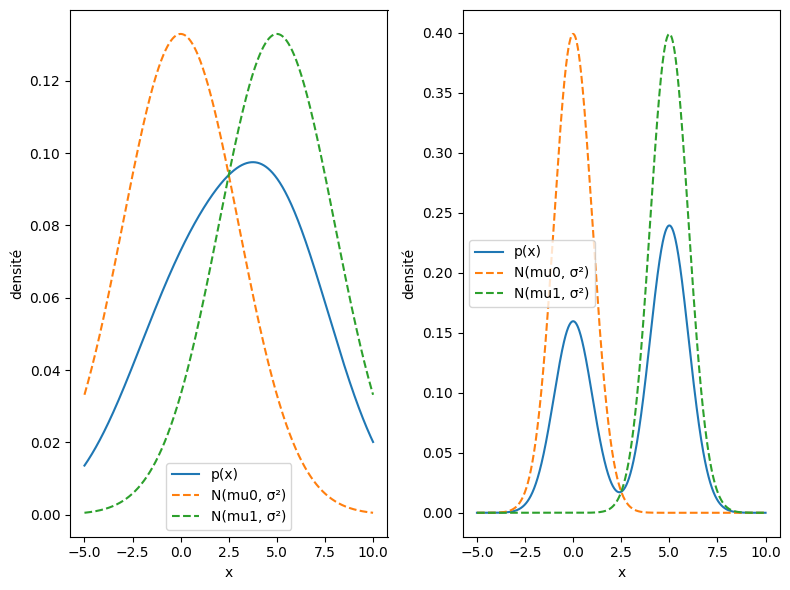

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

pi = 0.4
mu0, mu1 = 0, 5
sigma = 3

x = np.linspace(-5, 10, 1500)
p0 = norm.pdf(x, mu0, sigma)
p1 = norm.pdf(x, mu1, sigma)
px = pi * p0 + (1 - pi) * p1

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)   
plt.plot(x, px, label="p(x)")
plt.plot(x, p0, "--", label="N(mu0, σ²)")
plt.plot(x, p1, "--", label="N(mu1, σ²)")
plt.legend()
plt.xlabel("x")
plt.ylabel("densité")

sigma = 1
p0 = norm.pdf(x, mu0, sigma)
p1 = norm.pdf(x, mu1, sigma)
px = pi * p0 + (1 - pi) * p1

plt.subplot(1, 2, 2)   
plt.plot(x, px, label="p(x)")
plt.plot(x, p0, "--", label="N(mu0, σ²)")
plt.plot(x, p1, "--", label="N(mu1, σ²)")
plt.legend()
plt.xlabel("x")
plt.ylabel("densité")

plt.tight_layout()
plt.show()


### 7. 

En observant les graphiques obtenus :

- Pour $\sigma = 1$, la courbe $\pi(x)$ (courbe verte) passe très brutalement de 0 à 1.  
  Le point où $\pi(x)=0.5$ se situe autour de $x^* \approx 2.5$.

- Pour $\sigma = 3$, la courbe $\pi(x)$ est beaucoup plus étalée, mais coupe encore le niveau 0.5  
  au même endroit, vers $x^* \approx 2.5$.

Donc :

- La règle de décision ne change pas : on classe en 1 si $x \ge x^* \approx 2.5$.

- Mais l’incertitude augmente lorsque $\sigma$ augmente :  
  les densités se recouvrent davantage, et $\pi(x)$ évolue plus lentement, donc les décisions autour de $x^*$ sont moins fiables.


### 8.

On suppose que l’on dispose d’un jeu de données $(x_i, y_i)_{1 \le i \le n}$, et que ces paires sont i.i.d.  
On suppose aussi que $(X,Y)$ suit le modèle logistique défini précédemment.

#### (a) Que signifie l’hypothèse i.i.d. ?

L’hypothèse *i.i.d.* signifie indépendants et identiquement distribués :

Concrètement pour notre jeu de données, cela signifie que chaque ligne est un tirage du même modèle,
sans dépendance temporelle ni structure entre les observations.

#### (b) Comment estimer $\beta_0$ et $\beta_1$ par maximum de vraisemblance ?

Le modèle logistique donne :

$$
\pi(x) = \mathbb{P}(Y = 1 \mid X = x)
       = \frac{1}{1 + \exp\big(-( \beta_0 + \beta_1 x )\big)}.
$$

Pour une observation $(x_i, y_i)$, la probabilité d'observer $y_i$ vaut :

$$
\mathbb{P}(Y = y_i \mid X = x_i)
= \pi(x_i)^{y_i} \, (1 - \pi(x_i))^{1 - y_i}.
$$

Sous l’hypothèse i.i.d., la vraisemblance du jeu de données est :

$$
L(\beta_0, \beta_1)
= \prod_{i=1}^n \pi(x_i)^{y_i} (1 - \pi(x_i))^{1 - y_i}.
$$

On maximise plutôt la log-vraisemblance :

$$
\ell(\beta_0, \beta_1)
= \sum_{i=1}^n \Big[ y_i \log(\pi(x_i)) + (1 - y_i)\log(1 - \pi(x_i)) \Big].
$$

Les estimateurs du maximum de vraisemblance sont :

$$
(\hat{\beta}_0, \hat{\beta}_1)
= \arg\max_{\beta_0, \beta_1} \ \ell(\beta_0, \beta_1).
$$

On ne peut pas résoudre cela analytiquement ; il faut utiliser un algorithme numérique  




### I.2 Perceptron

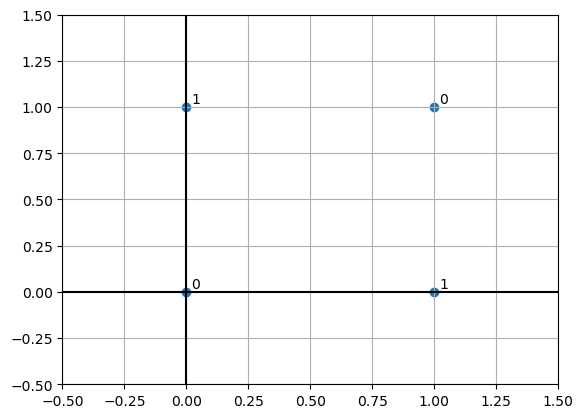

In [ ]:
import matplotlib.pyplot as plt


x = [0, 0, 1, 1]
y = [0, 1, 0, 1]
labels = [0, 1, 1, 0]  # valeurs de f(x1,x2)

plt.figure()


plt.scatter(x, y)


for xi, yi, lab in zip(x, y, labels):
    plt.text(xi + 0.02, yi + 0.02, str(lab))


plt.axhline(0, color='black')
plt.axvline(0, color='black')


plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.grid(True)


plt.show()



### 2.  
Pourquoi ne pouvons-nous pas trouver un perceptron simple ?

La table de vérité donnée correspond à la fonction logique OU exclusif (XOR) :

- $f(0,0)=0$
- $f(0,1)=1$
- $f(1,0)=1$
- $f(1,1)=0$

Cette fonction n’est pas linéairement séparable :  
Un perceptron simple réalisant une séparation linéaire ne peut donc pas modéliser cette fonction.

---

### 3. 

Un perceptron à une couche cachée de deux neurones permet de représenter cette fonction.

- Couche cachée :
  - $h_1 = \text{step}(x_1 + x_2 - 0.5)$  
  - $h_2 = \text{step}(x_1 + x_2 - 1.5)$

- Neurone de sortie :
  - $y = \text{step}(h_1 - h_2)$

Avec ce choix, on retrouve bien :  
$ f(0,0)=0,\quad f(0,1)=1,\quad f(1,0)=1,\quad f(1,1)=0. $

## I.3 Régression ReLU


### 1.a) Décomposition de $f$


On considère
$$
f(x) =
\begin{cases}
2x - 1 & \text{si } x \le 1,\\
1      & \text{si } x > 1.
\end{cases}
$$

On pose
$$
a_1(x) = 1 - x,
\qquad
a_2(z) = -2z + 1.
$$

Alors:

- si $x \le 1$, alors $(1-x) \ge 0$ donc $(\mathrm{ReLU}(a_1(x)) = 1-x$ et

  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = -2(1-x) + 1 = 2x - 1 = f(x).
  $$

- si $x \le 1$, alors $(1-x) \le 0$ donc $\mathrm{ReLU}(a_1(x)) = 0$ et

  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = a_2(0) = 1 = f(x).
  $$

  Donc:


$$
f = a_2 \circ \mathrm{ReLU} \circ a_1.
$$

## Décomposition de $g$

On considère  
$$
g(x) =
\begin{cases}
0 & \text{si } x < 0,\\
x & \text{si } 0 \le x \le 1,\\
1 & \text{si } x > 1.
\end{cases}
$$

On pose  
$$
a_1(x) = (x,\; x-1),
\qquad
a_2(u_1, u_2) = u_1 - u_2.
$$

Alors:

- si $x < 0$, on a $\mathrm{ReLU}(x)=0$ et $\mathrm{ReLU}(x-1)=0$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = g(x).
  $$

- si $0 \le x \le 1$, on a $\mathrm{ReLU}(x)=x$ et $\mathrm{ReLU}(x-1)=0$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = x - 0 = x = g(x).
  $$

- si $x > 1$, on a $\mathrm{ReLU}(x)=x$ et $\mathrm{ReLU}(x-1)=x-1$, donc  

  $$
  a_2(\mathrm{ReLU}(a_1(x))) = x - (x-1) = 1 = g(x).
  $$

### Conclusion :
$$
g = a_2 \circ \mathrm{ReLU} \circ a_1.
$$



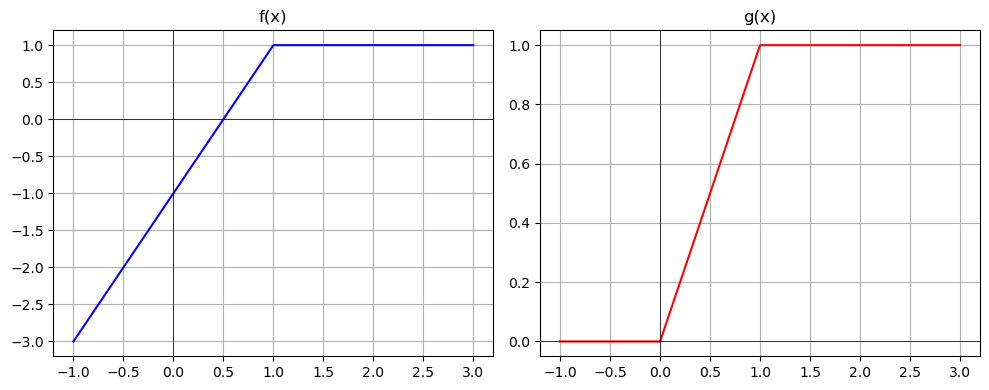

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)


def f(x):
    a1 = 1 - x
    return -2 * relu(a1) + 1


    u1 = relu(x)
    u2 = relu(x - 1)
    return u1 - u2

# Domaine pour la visualisation
xs = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,4))

# plot f
plt.subplot(1, 2, 1)
plt.plot(xs, f(xs), color='blue')
plt.title("f(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

# plot g
plt.subplot(1, 2, 2)
plt.plot(xs, g(xs), color='red')
plt.title("g(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Décomposition du premier triangle

On considère la fonction définie graphiquement par un triangle de base $\left(0,1\right)$ et de sommet $\left(\tfrac12, 1\right)$.  
Elle vaut
$$
T_1(x) =
\begin{cases}
0 & \text{si } x \le 0,\\
2x & \text{si } 0 \le x \le \tfrac12,\\
-2x + 2 & \text{si } \tfrac12 \le x \le 1,\\
0 & \text{si } x \ge 1.
\end{cases}
$$

On pose  
$$
a_1(x) = \bigl(x,\; x - \tfrac12,\; x - 1\bigr),
\qquad
a_2(u_1,u_2,u_3) = 2u_1 - 4u_2 + 2u_3.
$$

Alors :

- si $x \le 0$, on a  
  $\mathrm{ReLU}(x)=0$,  
  $\mathrm{ReLU}(x-\tfrac12)=0$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = T_1(x).
  $$

- si $0 \le x \le \tfrac12$, alors  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-\tfrac12)=0$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4\cdot 0 + 2\cdot 0
  = 2x
  = T_1(x).
  $$

- si $\tfrac12 \le x \le 1$, alors  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-\tfrac12)=x-\tfrac12$,  
  $\mathrm{ReLU}(x-1)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4(x-\tfrac12)
  = -2x + 2
  = T_1(x).
  $$

- si $x \ge 1$, alors  
  $\mathrm{ReLU}(x) = x$,  
  $\mathrm{ReLU}(x-\tfrac12) = x-\tfrac12$,  
  $\mathrm{ReLU}(x-1)=x-1$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 4(x-\tfrac12) + 2(x-1)
  = 0
  = T_1(x).
  $$

### Conclusion :
$$
T_1 = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 2. Décomposition du second triangle

On considère la fonction définie graphiquement par un triangle de base $\left(0, \tfrac32\right)$ et de sommet $\left(1,2\right)$.  
Elle vaut
$$
T_2(x) =
\begin{cases}
0 & \text{si } x \le 0,\\
2x & \text{si } 0 \le x \le 1,\\
-4x + 6 & \text{si } 1 \le x \le 1.5,\\
0 & \text{si } x \ge 1.5.
\end{cases}
$$

On pose  
$$
a_1(x) = \bigl(x,\; x-1,\; x-\tfrac32\bigr),
\qquad
a_2(v_1,v_2,v_3) = 2v_1 - 6v_2 + 4v_3.
$$

Alors :

- si $x \le 0$,  
  $\mathrm{ReLU}(x)=0$,  
  $\mathrm{ReLU}(x-1)=0$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 0 = T_2(x).
  $$

- si $0 \le x \le 1$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=0$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x))) = 2x = T_2(x).
  $$

- si $1 \le x \le 1.5$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=x-1$,  
  $\mathrm{ReLU}(x-\tfrac32)=0$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 6(x-1)
  = -4x + 6
  = T_2(x).
  $$

- si $x \ge 1.5$,  
  $\mathrm{ReLU}(x)=x$,  
  $\mathrm{ReLU}(x-1)=x-1$,  
  $\mathrm{ReLU}(x-\tfrac32)=x-\tfrac32$, donc  
  $$
  a_2(\mathrm{ReLU}(a_1(x)))
  = 2x - 6(x-1) + 4(x-\tfrac32)
  = 0
  = T_2(x).
  $$

### Conclusion :
$$
T_2 = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 3.a) Décomposition de $g_\alpha$

On reconnaît que $g_\alpha$ est exactement le triangle $T_1$ de la question 2 multiplié par $\alpha$.

On avait
$$
T_1(x) = 2\,\mathrm{ReLU}(x)
- 4\,\mathrm{ReLU}\!\left(x-\tfrac12\right)
+ 2\,\mathrm{ReLU}(x-1).
$$

Donc
$$
g_\alpha(x) = \alpha\,T_1(x)
= 2\alpha\,\mathrm{ReLU}(x)
- 4\alpha\,\mathrm{ReLU}\!\left(x-\tfrac12\right)
+ 2\alpha\,\mathrm{ReLU}(x-1).
$$

On pose alors simplement
$$
a_1(x) = \bigl(x,\; x-\tfrac12,\; x-1\bigr),
\qquad
a_2(u_1,u_2,u_3) = 2\alpha u_1 - 4\alpha u_2 + 2\alpha u_3.
$$

### Conclusion :
$$
g_\alpha = a_2 \circ \mathrm{ReLU} \circ a_1.
$$


## 3.b) Choix optimal de $\alpha$ en norme $L^2$

On veut choisir $\alpha > 0$ de sorte que $g_\alpha$ soit la meilleure approximation de
$$
h(x) =
\begin{cases}
\sin(\pi x) & \text{si } x \in \left(0,1\right),\\
0 & \text{sinon,}
\end{cases}
$$
au sens de la norme $L^2\left(\mathbb{R}\right)$.

Autrement dit, on veut minimiser
$$
\left\|h - g_\alpha\right\|_{L^2}^2
= \int_{\mathbb{R}} \left(h(x) - g_\alpha(x)\right)^2 \, dx.
$$

On a montré en 3.a que
$$
g_\alpha(x) = \alpha \,\varphi(x),
$$
où $\varphi$ est le triangle de la question 2.a :
$$
\varphi(x) =
\begin{cases}
2x & \text{si } x \in \left(0,\tfrac12\right),\\
-2x + 2 & \text{si } x \in \left(\tfrac12,1\right),\\
0 & \text{sinon.}
\end{cases}
$$

On définit donc
$$
J(\alpha) = \left\|h - g_\alpha\right\|_{L^2}^2
= \int_0^1 \left(h(x) - \alpha \varphi(x)\right)^2 \, dx.
$$

### Développement de $J(\alpha)$ comme polynôme en $\alpha$

On développe le carré :
$$
J(\alpha)
= \int_0^1 \left(h(x)^2 - 2\alpha h(x)\varphi(x) + \alpha^2 \varphi(x)^2\right)\,dx.
$$

En posant
$$
\langle f,g\rangle = \int_0^1 f(x)g(x)\,dx,
\qquad
\|f\|_{L^2}^2 = \langle f,f\rangle,
$$
on obtient
$$
J(\alpha)
= \|h\|_{L^2}^2
- 2\alpha \langle h,\varphi\rangle
+ \alpha^2 \|\varphi\|_{L^2}^2.
$$

C’est un polynôme du second degré en $\alpha$ :
$$
J(\alpha) = A\alpha^2 - 2B\alpha + C
$$
avec
$$
A = \|\varphi\|_{L^2}^2,
\quad
B = \langle h,\varphi\rangle,
\quad
C = \|h\|_{L^2}^2.
$$

Le minimum est atteint pour
$$
\alpha_{\min} = \frac{B}{A}
= \frac{\langle h,\varphi\rangle}{\|\varphi\|_{L^2}^2}.
$$

Il reste à calculer $\|\varphi\|_{L^2}^2$ et $\langle h,\varphi\rangle$.

---

### Calcul de $\|\varphi\|_{L^2}^2$

Par définition
$$
\|\varphi\|_{L^2}^2
= \int_0^1 \varphi(x)^2\,dx
= \int_0^{1/2} (2x)^2\,dx
+ \int_{1/2}^1 (-2x+2)^2\,dx.
$$

On calcule :
$$
\int_0^{1/2} (2x)^2\,dx
= \int_0^{1/2} 4x^2\,dx
= 4 \cdot \frac{x^3}{3}\Big|_{0}^{1/2}
= \frac{4}{3}\cdot \frac{1}{8}
= \frac{1}{6},
$$

et
$$
\int_{1/2}^1 (-2x+2)^2\,dx
= \int_{1/2}^1 4(x-1)^2\,dx
= 4 \cdot \frac{(x-1)^3}{3}\Big|_{1/2}^{1}
= 4 \cdot \frac{(-1/2)^3}{3}\cdot(-1)
= \frac{1}{6}.
$$

Donc
$$
\|\varphi\|_{L^2}^2
= \frac{1}{6} + \frac{1}{6}
= \frac{1}{3}.
$$

---

### Calcul de $\langle h,\varphi\rangle$

On a $h(x) = \sin(\pi x)$ sur $\left(0,1\right)$. Donc
$$
\langle h,\varphi\rangle
= \int_0^1 \sin(\pi x)\varphi(x)\,dx
= \int_0^{1/2} 2x\sin(\pi x)\,dx
+ \int_{1/2}^1 (-2x+2)\sin(\pi x)\,dx.
$$

Les intégrales donnent :
$$
\int_0^{1/2} 2x\sin(\pi x)\,dx = \frac{2}{\pi^2},
\qquad
\int_{1/2}^1 (-2x+2)\sin(\pi x)\,dx = \frac{2}{\pi^2}.
$$

Donc
$$
\langle h,\varphi\rangle
= \frac{2}{\pi^2} + \frac{2}{\pi^2}
= \frac{4}{\pi^2}.
$$

---

### Valeur de $\alpha_{\min}$

On a donc
$$
A = \|\varphi\|_{L^2}^2 = \frac{1}{3},
\qquad
B = \langle h,\varphi\rangle = \frac{4}{\pi^2}.
$$

Ainsi
$$
\alpha_{\min}
= \frac{B}{A}
= \frac{\dfrac{4}{\pi^2}}{\dfrac{1}{3}}
= \frac{12}{\pi^2}.
$$


### Conclusion :
$$
\boxed{\alpha_{\min} = \dfrac{12}{\pi^2}.}
$$




## I.4 CNN

### I.4.1 Opérateur linéaire
#### 1. 

On considère un noyau de convolution
$$
k = [\alpha,\beta,\gamma] \in \mathbb{R}^3,
$$
et un vecteur $y = (y_1,\dots,y_n) \in \mathbb{R}^n$.

La convolution 1D $(y * k) \in \mathbb{R}^{n-2}$ est donnée, pour $i=1,\dots,n-2$, par :
$$
(y * k)_i = \alpha\, y_i + \beta\, y_{i+1} + \gamma\, y_{i+2}.
$$

On cherche une matrice $C_k \in \mathbb{R}^{(n-2)\times n}$ telle que
$$
C_k\, y = 
\begin{pmatrix}
(y * k)_1 \\
(y * k)_2 \\
\vdots \\
(y * k)_{n-2}
\end{pmatrix}.
$$

Cette matrice s’écrit sous forme bande :

$$
C_k =
\begin{pmatrix}
\alpha & \beta & \gamma & 0 & \cdots & 0 \\
0 & \alpha & \beta & \gamma & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & \alpha & \beta & \gamma
\end{pmatrix}
\in \mathbb{R}^{(n-2)\times n}.
$$

#### 2.
On considère la matrice
$$
D = \frac{1}{h}
\begin{pmatrix}
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & -1 & 1
\end{pmatrix},
\qquad h = \frac{1}{n-1}.
$$

En comparant avec la forme matricielle de la convolution 1D,
on voit que $D$ correspond à un noyau de taille $p=2$ donné par
$$
k = \frac{1}{h}\,[-1,\; 1].
$$

On pose
$$
y_i = f\!\left(\frac{i-1}{n-1}\right), \quad i = 1,\dots,n,
$$
où $f : [0,1] \to \mathbb{R}$ est dérivable et $h = \frac{1}{n-1}$.

Alors
$$
(Dy)_i
= \frac{1}{h}\Big( f\!\left(\frac{i}{n-1}\right) - f\!\left(\frac{i-1}{n-1}\right) \Big)
= \frac{f(x_i + h) - f(x_i)}{h},
$$
avec
$$
x_i = \frac{i-1}{n-1}.
$$

On reconnaît une approximation par différences finies de la dérivée de $f$ :
$$
(Dy)_i \approx f'(x_i), \quad \text{pour } i=1,\dots,n-1.
$$

Ainsi, le vecteur $Dy$ représente une approximation discrète de la dérivée $f'$ aux points
$x_i = \dfrac{i-1}{n-1}$.

#### 3.

On considère le noyau
$$
k =
\begin{pmatrix}
\alpha & \beta \\
\gamma & \delta
\end{pmatrix},
$$
et une image
$$
x =
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{pmatrix}
\in \mathbb{R}^{3\times 3}.
$$

Sans *padding* et avec un *stride* de 1, la convolution produit une image $2\times 2$.

On vectorise l’image par lignes :
$$
x^{\mathrm{vec}} =
\begin{pmatrix}
x_{11} \\ x_{12} \\ x_{13} \\
x_{21} \\ x_{22} \\ x_{23} \\
x_{31} \\ x_{32} \\ x_{33}
\end{pmatrix}
\in \mathbb{R}^9.
$$

Les quatre valeurs issues de la convolution sont :
$$
\begin{aligned}
y_1 &= \alpha x_{11} + \beta x_{12} + \gamma x_{21} + \delta x_{22}, \\
y_2 &= \alpha x_{12} + \beta x_{13} + \gamma x_{22} + \delta x_{23}, \\
y_3 &= \alpha x_{21} + \beta x_{22} + \gamma x_{31} + \delta x_{32}, \\
y_4 &= \alpha x_{22} + \beta x_{23} + \gamma x_{32} + \delta x_{33}.
\end{aligned}
$$

En posant $y = (y_1,y_2,y_3,y_4)^T \in \mathbb{R}^4$, on obtient :
$$
y = C_k\, x^{\mathrm{vec}},
$$
avec la matrice de convolution
$$
C_k =
\begin{pmatrix}
\alpha & \beta & 0     & \gamma & \delta & 0      & 0      & 0      & 0 \\
0      & \alpha & \beta & 0      & \gamma & \delta & 0      & 0      & 0 \\
0      & 0      & 0     & \alpha & \beta  & 0      & \gamma & \delta & 0 \\
0      & 0      & 0     & 0      & \alpha & \beta  & 0      & \gamma & \delta
\end{pmatrix}
\in \mathbb{R}^{4\times 9}.
$$

#### 4.
On considère un noyau de convolution
$$
K =
\begin{pmatrix}
k_{11} & k_{12} & k_{13} \\
k_{21} & k_{22} & k_{23} \\
k_{31} & k_{32} & k_{33}
\end{pmatrix}
\in \mathbb{R}^{3\times 3},
$$
et une image
$$
X = (x_{ij})_{1\le i,j\le n} \in \mathbb{R}^{n\times n}.
$$

On travaille sans padding et avec un stride de 1.  
La convolution 2D $Y = X * K$ a alors pour taille $(n-2)\times (n-2)$, et ses composantes sont
$$
Y_{ij}
= \sum_{a=0}^2 \sum_{b=0}^2 K_{a+1,b+1}\, X_{i+a,\; j+b},
\qquad 1 \le i,j \le n-2.
$$

On vectorise l’image d’entrée par lignes :
$$
x^{\mathrm{vec}} =
\begin{pmatrix}
x_{11} \\ x_{12} \\ \cdots \\ x_{1n} \\
x_{21} \\ \vdots \\ x_{2n} \\
\vdots \\
x_{n1} \\ \cdots \\ x_{nn}
\end{pmatrix}
\in \mathbb{R}^{n^2},
$$
et de même pour la sortie :
$$
y^{\mathrm{vec}} =
\begin{pmatrix}
Y_{11} \\ Y_{12} \\ \cdots \\ Y_{1,n-2} \\
Y_{21} \\ \vdots \\ Y_{2,n-2} \\
\vdots \\
Y_{n-2,1} \\ \cdots \\ Y_{n-2,n-2}
\end{pmatrix}
\in \mathbb{R}^{(n-2)^2}.
$$

Il existe alors une matrice de convolution
$$
C_K \in \mathbb{R}^{(n-2)^2 \times n^2}
$$
telle que
$$
y^{\mathrm{vec}} = C_K\, x^{\mathrm{vec}}.
$$

Chaque ligne de $C_K$ correspond à une position $(i,j)$ du noyau sur l’image, avec  
$$
1 \le i,j \le n-2,
$$
et contient exactement $9$ coefficients non nuls, égaux aux coefficients du noyau $K$,
positionnés aux colonnes correspondant aux pixels
$$
X_{i+a,j+b}, \qquad a,b \in \{0,1,2\}.
$$

Si l’on numérote la colonne associée au pixel $X_{pq}$ par
$$
\mathrm{col}(p,q) = (p-1)n + q,
$$
alors la ligne de $C_K$ associée à la position $(i,j)$ a pour entrées non nulles :
$$
C_K\big[\mathrm{row}(i,j),\; \mathrm{col}(i+a, j+b)\big]
= K_{a+1,b+1},
\qquad a,b \in \{0,1,2\}.
$$

où
$$
\mathrm{row}(i,j) = (i-1)(n-2) + j.
$$

Ainsi, comme dans le cas $3\times 3$ vers $2\times 2$, la convolution 2D
avec un noyau $3\times 3$ s’écrit comme une application linéaire
$$
\boxed{
y^{\mathrm{vec}} = C_K\, x^{\mathrm{vec}},
\qquad
C_K \in \mathbb{R}^{(n-2)^2 \times n^2}.
}
$$
La formule est compliqué mais  $C_K$ correspond à la matrice dans la question 3 mais avec un nombre (n-3) de zéros entre les coefficients de 2 lignes consécutives de la matrice kernel.
#### 5.
On considère la matrice de convolution $C_K$ associée à un noyau de taille $3\times 3$
et une image de taille $n \times n$.

La matrice $C_K$ appartient à $\mathbb{R}^{(n-2)^2 \times n^2}$, donc le nombre total
d’éléments est
$$
N_{\text{tot}} = (n-2)^2 \, n^2.
$$

Chaque ligne de $C_K$ contient exactement $9$ coefficients non nuls.  
Il y a $(n-2)^2$ lignes, donc le nombre d’éléments non nuls est
$$
N_{\text{nz}} = 9 (n-2)^2.
$$

Le nombre d’éléments nuls est donc
$$
N_{\text{z}} = N_{\text{tot}} - N_{\text{nz}}
= (n-2)^2 n^2 - 9 (n-2)^2
= (n-2)^2 (n^2 - 9).
$$

On en déduit le sparsity index de $C_K$ :
$$
s(C_K)
= \frac{N_{\text{z}}}{N_{\text{tot}}}
= \frac{(n-2)^2 (n^2 - 9)}{(n-2)^2 n^2}
= \frac{n^2 - 9}{n^2}
= 1 - \frac{9}{n^2}.
$$
Pour une taille de kernel quelconque (p), changer 2 par p + 1 et 9 par p².
#### 6.
Le kernel pour passé d'une taille 9 à 4 avec un stride de 1 est nécessairement de taille 5x5.
$$
f : \mathbb{R}^{9} \longrightarrow \mathbb{R}^{4},
\qquad
y = W x,
$$
avec
$$
W \in \mathbb{R}^{4 \times 9},
\quad
x \in \mathbb{R}^{9},
\quad
y \in \mathbb{R}^{4}.
$$


$$
N_{\text{tot}} = 4 \times 9 = 36.
$$

Par définition :
$$
s(W) = \frac{N_{\text{z}}}{N_{\text{tot}}},
$$
où $N_{\text{z}}$ désigne le nombre d’éléments nuls de $W$.

$$
s(W) = 1 - \frac{25}{81}
$$


### I.4.2 Équivariance  
#### 1.

On rappelle que la convolution est définie par :

$$
(f * k)(x) = \int_{\mathbb{R}^2} f(z)\,k(z - x)\,dz.
$$

et que l’opérateur de translation est défini par :

$$
\varphi_y(f)(x) = f(x - y).
$$

On calcule la convolution de la fonction translatée :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} \varphi_y(f)(z)\,k(z - x)\,dz.
$$

En utilisant la définition de la translation :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(z - y)\,k(z - x)\,dz.
$$

Changement de variable : $u = z - y$, donc $dz = du$ :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(u)\,k((u + y) - x)\,du.
$$

Ce qui donne :

$$
(\varphi_y(f) * k)(x)
= \int_{\mathbb{R}^2} f(u)\,k(u + y - x)\,du
= \int_{\mathbb{R}^2} f(u)\,k(u - (x - y))\,du.
$$

Par définition de la convolution :

$$
(f * k)(x - y)
= \int_{\mathbb{R}^2} f(u)\,k(u - (x - y))\,du.
$$

Donc :

$$
(\varphi_y(f) * k)(x) = (f * k)(x - y).
$$

Enfin :

$$
\varphi_y(f * k)(x) = (f * k)(x - y).
$$

Ainsi, pour tout $x \in \mathbb{R}^2$ :

$$
(\varphi_y(f) * k)(x) = \varphi_y(f * k)(x),
$$

ce qui montre :

$$
\varphi_y(f) * k = \varphi_y(f * k).
$$

#### 2.

Dans les CNN la convolution joue un rôle dans l’extraction des caractéristiques des images. Elle consiste à faire glisser un noyau sur l’image afin de calculer des produits de convolution locaux. Chaque filtre est conçu pour détecter des motifs spécifiques tels que des contours, des textures ou des formes. En empilant plusieurs couches de convolution, le réseau apprend progressivement des représentations de plus en plus complexes. De plus, la convolution permet un partage des poids ce qui réduit le nombre de paramètres par rapport à un réseau dense et améliore la généralisation du modèle.

Le pooling permet de réduire la dimension spatiale. Il résume l’information locale contenue dans une petite région de la carte de caractéristiques. Généralement il prend la valeur maximale ou la moyenne. Cette opération permet trois fonction :

- diminuer la taille des représentations
- réduire le coût de calcul
- limiter le surapprentissage.

Ainsi, la convolution extrait l’information pertinente, tandis que le pooling la simplifie et la rend plus robuste.

#### 1.

On considère la matrice de rotation :
$$
R_\theta =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}.
$$

- Pour $\theta = 0$ :
$$
R_0 =
\begin{pmatrix}
\cos 0 & -\sin 0 \\
\sin 0 & \cos 0
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

- Pour $\theta = 2\pi$ :
$$
R_{2\pi} =
\begin{pmatrix}
\cos(2\pi) & -\sin(2\pi) \\
\sin(2\pi) & \cos(2\pi)
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

- Pour $\theta = \pi$ :
$$
R_\pi =
\begin{pmatrix}
\cos \pi & -\sin \pi \\
\sin \pi & \cos \pi
\end{pmatrix}
=
\begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix}.
$$

On veut maintenant montrer que, pour tous $\theta_1,\theta_2 \in \mathbb{R}$ :
$$
R_{\theta_1} R_{\theta_2} = R_{\theta_1+\theta_2}.
$$

On calcule le produit matriciel :
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos\theta_1 & -\sin\theta_1 \\
\sin\theta_1 & \cos\theta_1
\end{pmatrix}
\begin{pmatrix}
\cos\theta_2 & -\sin\theta_2 \\
\sin\theta_2 & \cos\theta_2
\end{pmatrix}.
$$

D'où
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos(\theta_1 + \theta_2) & -\sin(\theta_1 + \theta_2) \\
\sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2)
\end{pmatrix}.
$$

Donc :
$$
R_{\theta_1} R_{\theta_2}
=
\begin{pmatrix}
\cos(\theta_1 + \theta_2) & -\sin(\theta_1 + \theta_2) \\
\sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2)
\end{pmatrix}
= R_{\theta_1 + \theta_2},
$$

#### 2.

On considère l'opération :
$$
x \;\longmapsto\; \max_{0 \le k \le 3} \, (f \otimes k)\big(x, k\pi/2\big).
$$

Cette opération combine deux mécanismes :

- le paramètre $k$ tel que $0 \le k \le 3$ correspond à des rotations successives selon des angles multiples de $\frac{\pi}{2}$. Le noyau de convolution est évalué pour quatre orientations : $0^\circ$, $90^\circ$, $180^\circ$ et $270^\circ$. Cette opération permet de détecter des motifs quelle que soit leur orientation, ce qui introduit une invariance par rotation ;

- l’opération $\max_{0 \le k \le 3}(\cdot)$ consiste à conserver uniquement la réponse maximale parmi les quatre orientations possibles. Elle joue un rôle d'un pooling où seule l’orientation pour laquelle la réponse du filtre est la plus forte est retenue. Cela renforce la robustesse du réseau face aux rotations.

Ainsi, cette transformation permet d’exploiter explicitement la symétrie de rotation présente dans les données tout en ne conservant que l’information la plus discriminante pour la reconnaissance de formes.

On considère l’opération :
$$
x \;\longmapsto\; \frac{1}{2\pi} \int_0^{2\pi} (f \otimes k)(x,\theta)\, d\theta.
$$

Ici, on applique le noyau de convolution pour toutes les orientations $\theta \in [0,2\pi]$, puis on effectue une moyenne continue des réponses obtenues. L’objectif de cette opération est d’introduire une invariance complète par rotation. En effet, la réponse ne dépendra plus de l’orientation de l’objet dans l’image, mais uniquement de sa présence.

Contrairement au pooling spatial discret, cette opération nécessite le calcul d’une intégrale continue, ce qui introduit des difficultés numériques en pratique, notamment en termes de :
- discrétisation de l’intervalle des angles ;
- coût de calcul élevé ;
- approximation numérique de l’intégrale ;
- coût mémoire plus important.

## I.5 Softmax

 On considère une version modifiée du softmax qui dépend d’un paramètre T :
$$
S_T(z)=\frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}, \qquad T>0.
$$

#### (a)
Par définition, pour tout $i \in \{1,\dots,n\}$,
$$
S_T(z) = \frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}.
$$

On calcule la somme des composantes :
$$
\sum_{i=1}^n S_T(z)
= \sum_{i=1}^n \frac{e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}.
$$

Comme le dénominateur ne dépend pas de $i$, on peut le factoriser :
$$
\sum_{i=1}^n S_T(z)_i
= \frac{1}{\sum_{j=1}^n e^{z_j/T}} \sum_{i=1}^n e^{z_i/T}.
$$

D'où
$$
\sum_{i=1}^n S_T(z)_i
= \frac{\sum_{i=1}^n e^{z_i/T}}{\sum_{j=1}^n e^{z_j/T}}
= 1.
$$

De plus, on peut en déduire que le vecteur $S_T(z)$ est une distribution de probabilité.

#### (b)

On note 
$$
S_T(z) = (s_1,\dots,s_5)
$$
le vecteur des probabilités associé à $z = (-2, 3, 4, 1, 0)$.

Pour $T = 1$ :
$$
S_1(z) \approx \big(1.7\times 10^{-3},\; 0.26,\; 0.70,\; 0.035,\; 1.2\times 10^{-2}\big).
$$

Pour $T = 0.2$ :
$$
S_{0.2}(z) \approx \big(9.3\times 10^{-14},\; 6.7\times 10^{-3},\; 0.99,\; 5.6\times 10^{-9},\; 2\times 10^{-9}\big).
$$

Pour $T = 10$ :
$$
S_{10}(z) \approx \big(0.14,\; 0.23,\; 0.26,\; 0.19,\; 0.17\big).
$$

#### (c)

On considère, pour $T > 0$ et $z = (z_1,\dots,z_n) \in \mathbb{R}^n$, les composantes de
$$
S_T(z) = \frac{e^{z_i/T}}{\displaystyle\sum_{j=1}^n e^{z_j/T}}, 
\qquad i = 1,\dots,n.
$$

On veut étudier la limite de S_T(z) quand $T \to +\infty$.

Pour chaque $i$, comme $z_i$ est fixé,
$$
\frac{z_i}{T} \xrightarrow[T \to +\infty]{} 0.
$$

La fonction exponentielle est continue, donc par composition :
$$
e^{z_i/T} \xrightarrow[T \to +\infty]{} e^0 = 1.
$$

Pour le dénominateur, on a :
$$
\sum_{j=1}^n e^{z_j/T} \xrightarrow[T \to +\infty]{} \sum_{j=1}^n 1 = n,
$$

D'où
$$
\lim_{T \to +\infty} s_i = \frac{1}{n},
$$
Ainsi,
$$
S_T(z) \xrightarrow[T \to +\infty]{}\left(\frac{1}{n},\dots,\frac{1}{n}\right),
$$
c’est-à-dire que la distribution $S_T(z)$ converge vers la loi uniforme sur $\{1,\dots,n\}$.


#### (d)

On considère, pour $T > 0$ et $z = (z_1,\dots,z_n) \in \mathbb{R}^n$, le vecteur
$$
S_T(z) = \big(s_1,\dots,s_n\big),
$$
où, pour chaque $i \in \{1,\dots,n\}$,
$$
s_i = \frac{e^{z_i/T}}{\displaystyle\sum_{k=1}^n e^{z_k/T}}.
$$

On veut étudier la limite du vecteur $S_T(z)$ quand $T \to 0^+$.

On suppose qu’il existe un unique indice $j \in \{1,\dots,n\}$ tel que
$$
z_j > z_i \quad \text{pour tout } i \neq j.
$$

Pour un indice $i$ fixé, on réécrit $s_i$ en divisant le numérateur et le dénominateur par $e^{z_i/T}$.
D'où,
$$
s_i
= \frac{e^{z_i/T}}{\displaystyle\sum_{k=1}^n e^{z_k/T}}
= \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_i)/T}}.
$$


#### Cas 1 : $i = j$

On a $z_j - z_i = 0$, donc
$$
e^{(z_j - z_i)/T} = e^0 = 1 \quad \text{pour tout } T>0.
$$

Pour $k \neq j$, on a $z_k < z_j$, donc $z_k - z_j < 0$.  
d’où
$$
e^{(z_k - z_j)/T} \xrightarrow[T\to 0^+]{} 0.
$$

Ainsi,
$$
\sum_{k=1}^n e^{(z_k - z_j)/T}
= 1 + \sum_{k\neq j} e^{(z_k - z_j)/T}
\xrightarrow[T\to 0^+]{} 1,
$$
et donc
$$
\lim_{T\to 0^+} s_j
= \lim_{T\to 0^+} \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_j)/T}}
= 1.
$$


#### Cas 2 : $i \neq j$

On a $z_j > z_i$, donc $z_j - z_i > 0$ et, pour $k = j$,
$$
e^{(z_j - z_i)/T} \xrightarrow[T\to 0^+]{} +\infty.
$$

Comme tous les termes de la somme sont positifs,
$$
\sum_{k=1}^n e^{(z_k - z_i)/T} \;\ge\; e^{(z_j - z_i)/T} \xrightarrow[T\to 0^+]{} +\infty.
$$

Par conséquent,
$$
\lim_{T\to 0^+} s_i
= \lim_{T\to 0^+} \frac{1}{\displaystyle\sum_{k=1}^n e^{(z_k - z_i)/T}}
= 0 \quad \text{pour tout } i \neq j.
$$


Donc, pour chaque $i \in \{1,\dots,n\}$,
$$
\lim_{T\to 0^+} s_i =
\begin{cases}
1, & \text{si } i = j,\\[4pt]
0, & \text{si } i \neq j.
\end{cases}
$$

Finalement, $S_T(z)$ quand $T \to 0^+$ tend vers un vecteur où une de ses composantes vaut 1 et les autres 0.

#### (e)

De l'étude de ses limites, on en déduit que plus $T$ est petit plus la probabilité se concentre sur la valeur maximale, il s'agit d'un comportement quasi déterministe. Alors que plus $T$ est grand, plus la distribution devient uniforme favorisant l’exploration des différentes sorties.

# **Partie II** : Application à un jeu de données

In [1]:
import pandas as pd

data = pd.read_csv("bike_daily.csv")
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Aucune valeur manquante

In [3]:
print(data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Clairement, season, month week day, year, holiday, sont des variables catégorielles même si ce sont des nombres. 

On va faire PCA sur les variables temp, atemp, hum, windspeed. 
On va traiter les variables continues. On va quand même faire aussi l'analyse factorielle parce que season, yr, month peuvent quand même être incluse dans un neural network. 

#### ***Bibliothèques Importées***

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 
import lightning as pl
from lightning.pytorch.utilities.model_summary import ModelSummary
from simplelogger import SimpleLogger

X = data[["temp", "atemp", "hum", "windspeed"]]
X.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


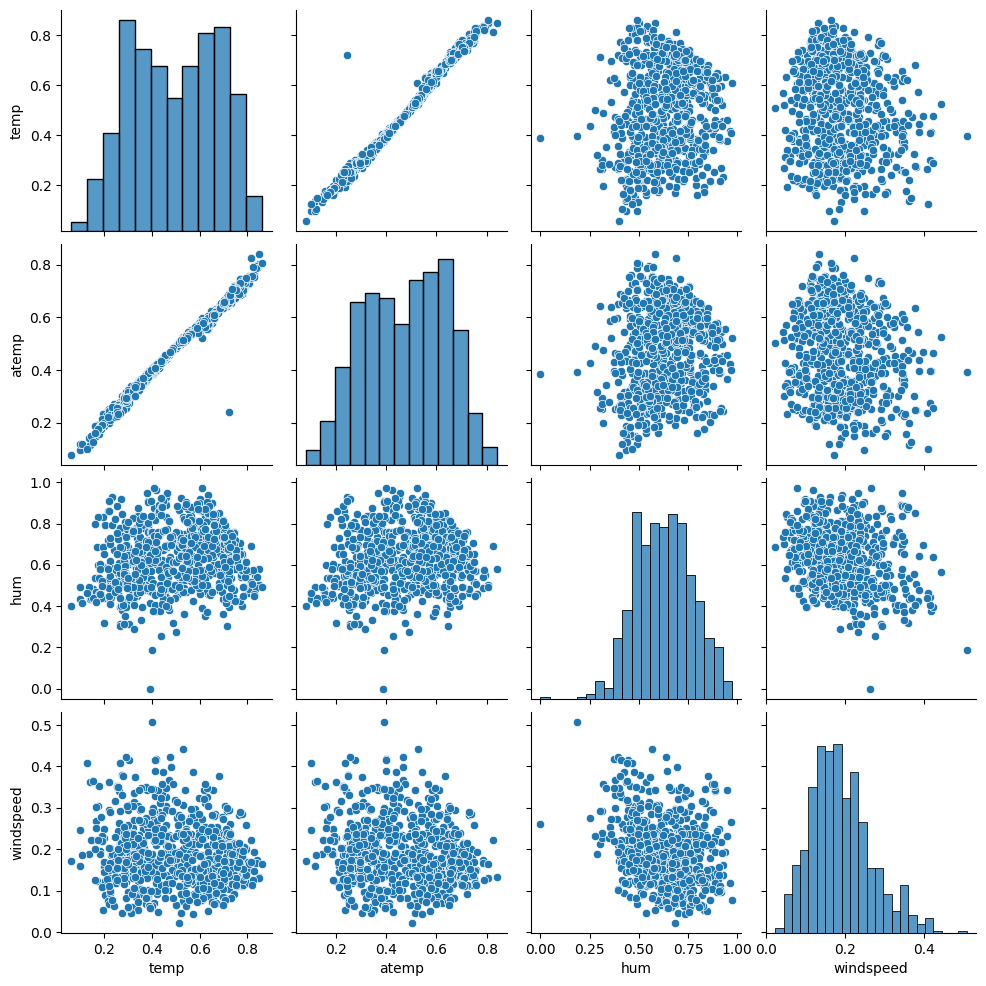

In [5]:
sns.pairplot(X)
plt.show()

Clairement, atemp et temp sont corrélé positivement.Pour le reste, c'est incertain. 

<Figure size 1000x600 with 0 Axes>

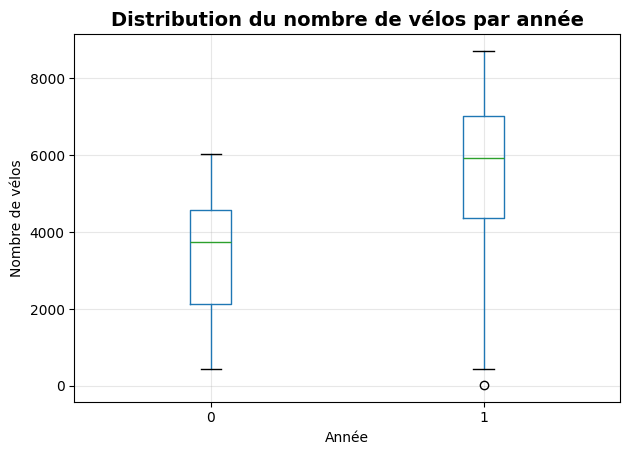

In [6]:
plt.figure(figsize=(10, 6))
data.boxplot(column='cnt', by='yr')
plt.suptitle('')  # Enlever le titre automatique
plt.title('Distribution du nombre de vélos par année', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Nombre de vélos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

L'année est aussi un paramètre à prendre en compte pour prédire le nombre de vélo. Il y a clairement une tendance.

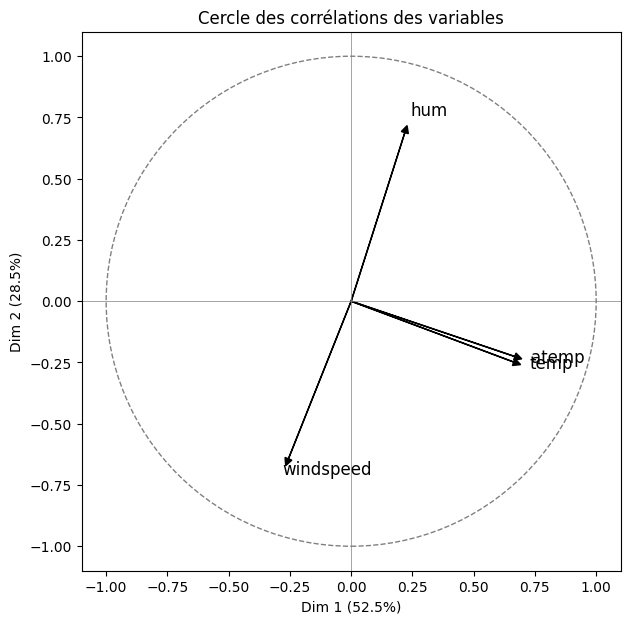

In [8]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)

pca.fit(X_scaled)
components = pca.components_.T  

fig, ax = plt.subplots(figsize=(7,7))

circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
ax.add_artist(circle)

for i, var in enumerate(X.columns):
    x = components[i, 0]
    y = components[i, 1]
    ax.arrow(0, 0, x, y, 
             head_width=0.03, 
             head_length=0.03, 
             linewidth=1, 
             color="black")
    ax.text(x * 1.1, y * 1.1, var, fontsize=12)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_title("Cercle des corrélations des variables")
ax.axhline(0, color='grey', linewidth=0.5)
ax.axvline(0, color='grey', linewidth=0.5)
ax.set_aspect('equal')

plt.show()

On voit que atemp et temp sont fortement corrélé et représente les vecteurs qui représente le mieux la dimension principale. Tandis que windspeed et humidité sont corrélé négativement avec des flèches dont l'angle est proche de 180°. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_12904\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_12904\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_factor[col] = X_factor[col].astype("category")
C:\Users\enzom\AppData\Local\Temp\ipykernel_12904\1711461745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

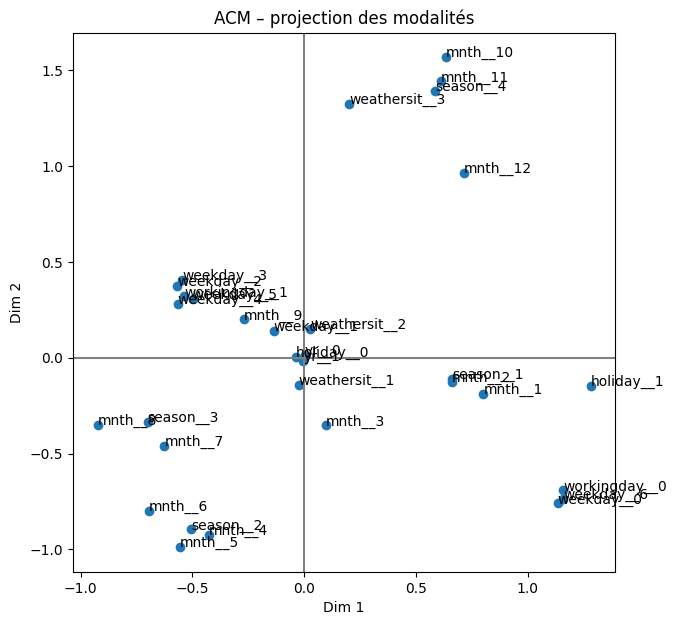

In [9]:
import prince

X_factor = data[["yr", "season", "mnth", "holiday",
                 "weekday", "workingday", "weathersit"]]

# Convertir en catégories
for col in X_factor.columns:
    X_factor[col] = X_factor[col].astype("category")

# ACM avec engine correct
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    engine='sklearn', 
    random_state=42
)

mca = mca.fit(X_factor)

coords = mca.column_coordinates(X_factor)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))

coords = mca.column_coordinates(X_factor)

ax.scatter(coords[0], coords[1])

for i, txt in enumerate(coords.index):
    ax.annotate(txt, (coords.iloc[i,0], coords.iloc[i,1]))

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.title("ACM – projection des modalités")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()



On voit nettement des clusters. season_4 est proche de mnth_11 mnth_12... season_4 est l'hiver. Pour éviter d'avoir un cercle de corélation trop dense, on va supprimer de l'analyse factorielle les mois et garder uniquement les saisons. 

C:\Users\enzom\AppData\Local\Temp\ipykernel_12904\2040214358.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


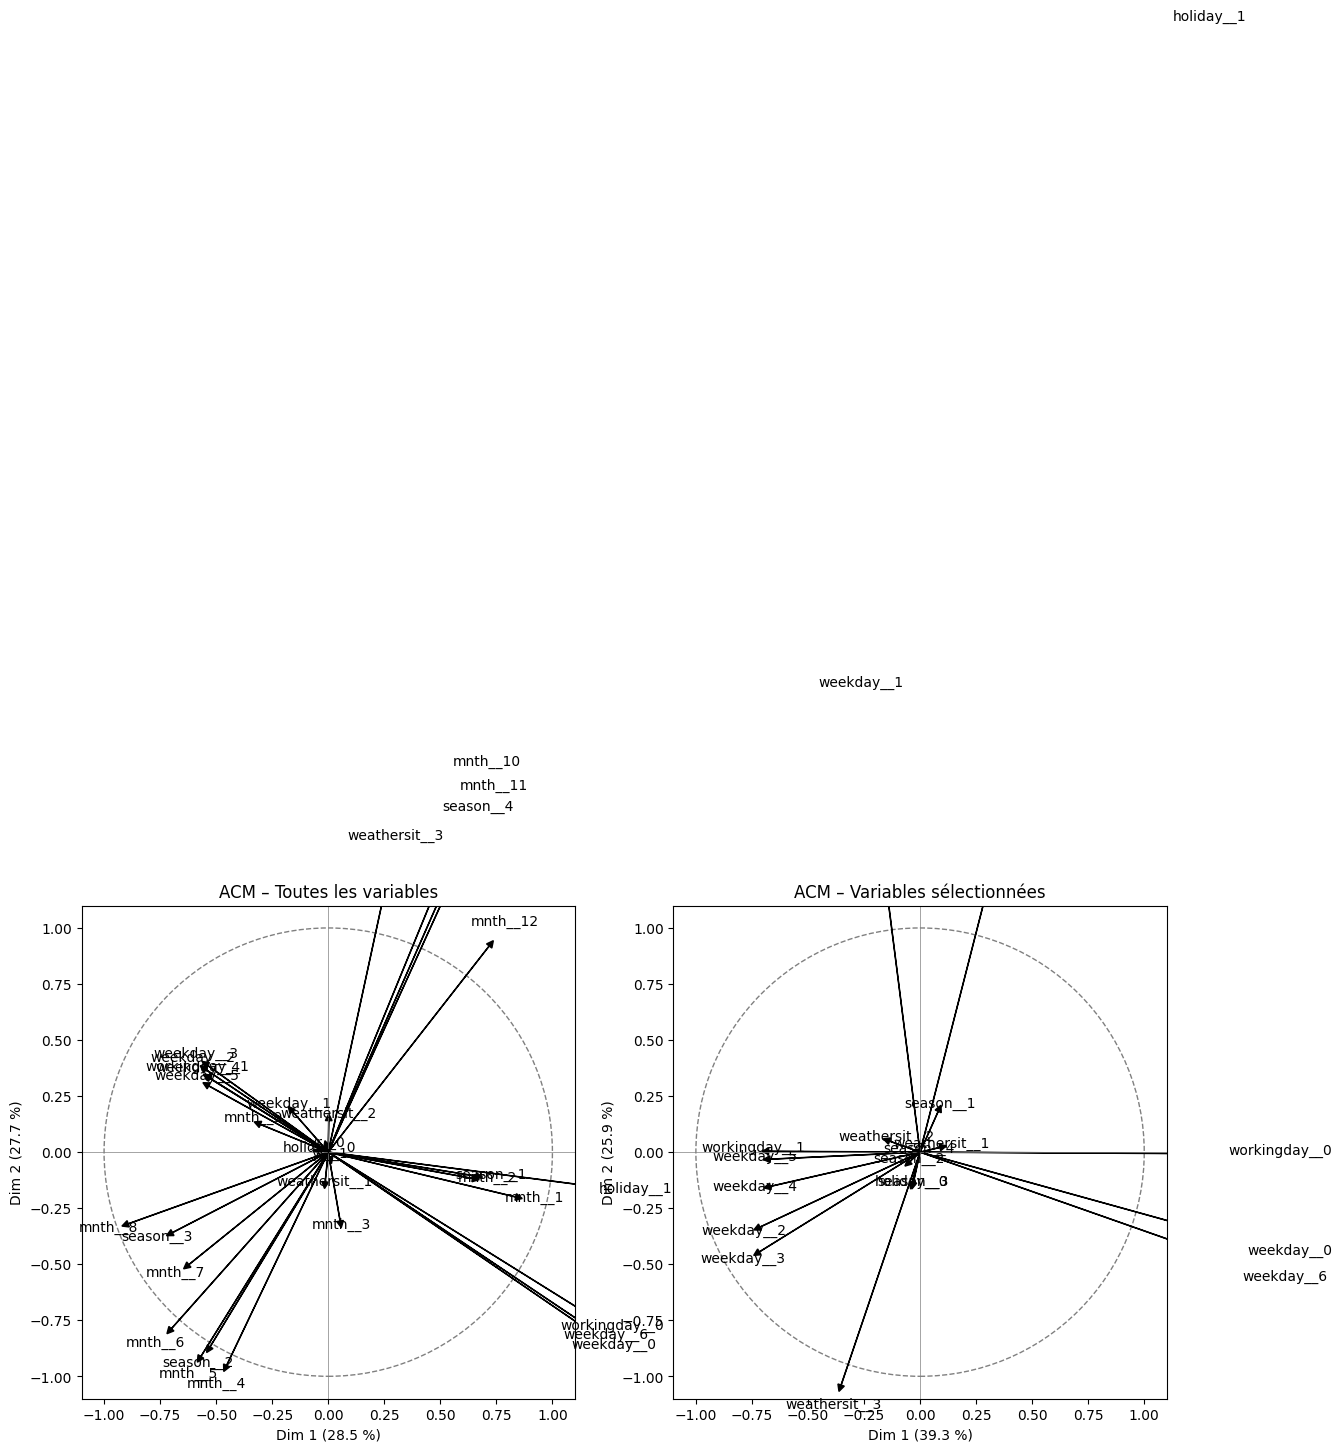

In [10]:
variables_categorielles = [
    "season", "holiday",
    "weekday", "workingday", "weathersit", "mnth", "yr"
]
variables_cat2 = [
    "season", "holiday",
    "weekday", "workingday", "weathersit"
]

X_factor = data[variables_categorielles].copy()
X_factor = X_factor.astype("category")

X_factor2 = data[variables_cat2].copy()
X_factor2 = X_factor2.astype("category")

mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca.fit(X_factor)

mca2 = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca2.fit(X_factor2)

coords = mca.column_coordinates(X_factor)
inertia = mca.eigenvalues_
dim1, dim2 = inertia[0], inertia[1]

coords2 = mca2.column_coordinates(X_factor2)
inertia2 = mca2.eigenvalues_
dim1_2, dim2_2 = inertia2[0], inertia2[1]

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

cercle1 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[0].add_artist(cercle1)

for modalite, (x, y) in coords.iterrows():
    ax[0].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[0].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[0].set_xlim(-1.1, 1.1)
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlabel(f"Dim 1 ({dim1 * 100:.1f} %)")
ax[0].set_ylabel(f"Dim 2 ({dim2 * 100:.1f} %)")
ax[0].set_title("ACM – Toutes les variables")
ax[0].axhline(0, color='grey', linewidth=0.5)
ax[0].axvline(0, color='grey', linewidth=0.5)
ax[0].set_aspect('equal')

cercle2 = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
ax[1].add_artist(cercle2)

for modalite, (x, y) in coords2.iterrows():
    ax[1].arrow(
        0, 0, x, y,
        head_width=0.03,
        head_length=0.03,
        linewidth=1,
        color="black"
    )
    ax[1].text(x * 1.1, y * 1.1, modalite, fontsize=10, ha='center')

ax[1].set_xlim(-1.1, 1.1)
ax[1].set_ylim(-1.1, 1.1)
ax[1].set_xlabel(f"Dim 1 ({dim1_2 * 100:.1f} %)")
ax[1].set_ylabel(f"Dim 2 ({dim2_2 * 100:.1f} %)")
ax[1].set_title("ACM – Variables sélectionnées")
ax[1].axhline(0, color='grey', linewidth=0.5)
ax[1].axvline(0, color='grey', linewidth=0.5)
ax[1].set_aspect('equal')

plt.tight_layout()
plt.show()

J'ai commencé mon approche en enlevant les features contenant l'année et les mois. Nous avons obtenu le cercle de corrélation de droite. Nous avons dans un premier temps analysé que la composante principale capte essentiellement la variabilité comprise dans workingday = False. L’axe 2 oppose :
des jours particuliers (lundi, jour férié) à des situations de météo très dégradée (weathersit_3). Les deux axes représentent 65,2% de l’inertie, soit une bonne représentation globale pour une ACM. Si on veut par la suite éliminer ou ajouter des variables catégorielles dans notre modèle mais pas trop, on pourrait tester avec un set de variables non corrélés. On va essayer une régression linéaire simple avec les variables catégorielles : workingday et weathersit même si weathersit est potentielement fortement corrélé aux données quantitatives de vent, d'humidité et de température. Si les p_values sont faibles. On les incluera dans le modèle. Prendre holiday et working day même s'ils apparraissent décorrélé sur le cercle, on sait en pratique qu'ils sont fortement corrélés. 

En plottant le cercle de corrélation avec l'ensemble des features catégorielles, on a désormais plus le problème avec les features holiday et working day qui apparaisse plus corrélé. On dégage mieux le fait qu'il y ait un groupe [bad weather, mois de l'hiver] et à l'opposé [good weather, mois d'été] et perpendiculairement, les jours travaillés et les jours non travaillé. 

In [11]:
contingence = pd.crosstab(data["holiday"], data["workingday"],
                   rownames=["holiday"],
                   colnames=["workingday"])

print(contingence)

workingday    0    1
holiday             
0           210  500
1            21    0


Comme on le voit sur la matrice de contingence on ne peut pas travailler et être en vacances. Le cas contraire aurait remis en question l'intégrité de la base de donnée. 

In [12]:
import statsmodels.api as sm

y = data["cnt"]
test_cat = ["weathersit", "workingday", 'yr']

X_categories = X_factor.loc[:,test_cat]
x = pd.get_dummies(X_categories, drop_first=True)#on retire la première variable sinon la matrice n'est pas inversible.

x = x.astype(int)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           1.54e-80
Time:                        18:46:11   Log-Likelihood:                -6379.6
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     726   BIC:                         1.279e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3570.1233    119.741     29.815   

Le modèle de régression linéaire avec les variables catégorielles démontre que pour les features catégorielles choisient (year, condition météo, working_day) expliquent en parti le nombre de vélos utilisés au total. (p_values < 0.05)

In [13]:
X_scaled = X_scaled[:, [0, 2, 3]]

On supprime atemp colinéaire à temp

On supprime la variable quantitative atemp mais on choisit de garder dans un premier temps toutes les variables catégorielles pour le modèle de clssification. 

In [ ]:
import random
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    pl.seed_everything(seed, workers=True)

seed_everything(42)

Seed set to 42


Les résultats variaient selon les éxecutions, or ça pose problème quand on analyse les résultats, un indicateur statistique peut varier entre 2 executions. 

In [103]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y = y_binary.values 

test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,  
    stratify=y, 
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 28])
y_train shape: torch.Size([584])
x_test shape : torch.Size([147, 28])


In [104]:


class BikeModelBinaryClassification(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(BikeModelBinaryClassification, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16, 2) 
        )
        self.loss_fn = nn.CrossEntropyLoss()  
        self.lr = lr
        
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = torch.argmax(yhat, dim=1)
        accuracy = (predictions == y).float().mean()

        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log(f"train_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.loss_fn(yhat, y)
        
        predictions = torch.argmax(yhat, dim=1)
        accuracy = (predictions == y).float().mean()
        
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)
        self.log(f"val_acc", accuracy, on_step=False, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer


model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)

summary = ModelSummary(model)
print(summary)



  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 1.5 K  | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 1.5 K  | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 183.15it/s, v_num=Data, val_loss=0.285, val_acc=0.918, train_loss=0.0957, train_acc=0.967]

`Trainer.fit` stopped: `max_epochs=45` reached.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 182.51it/s, v_num=Data, val_loss=0.285, val_acc=0.918, train_loss=0.0957, train_acc=0.967]
temps nécessaire pour entraîner :  18.791972875595093


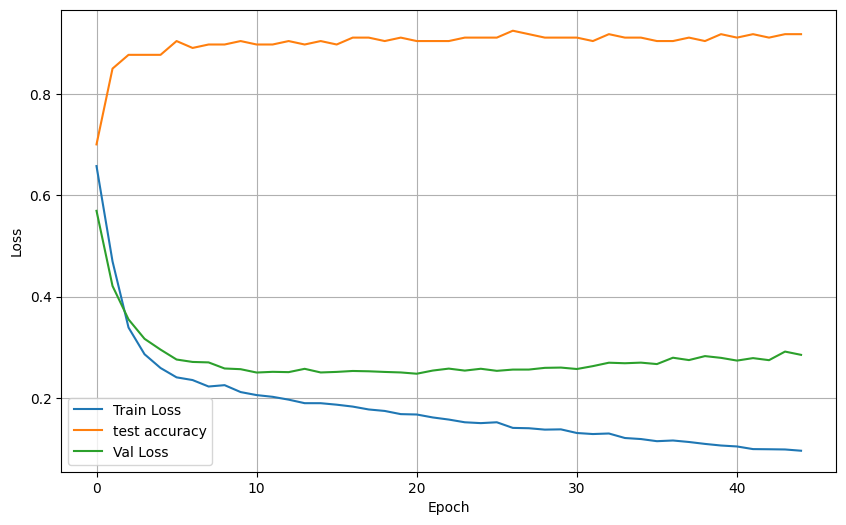

In [105]:
import time 
start_time = time.time()
trainer = pl.Trainer(
    max_epochs=45,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  

trainer.fit(model, train_loader, test_loader)
end_time = time.time()

print("temps nécessaire pour entraîner : ", end_time - start_time)
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [88]:
x_train.shape[1]

7

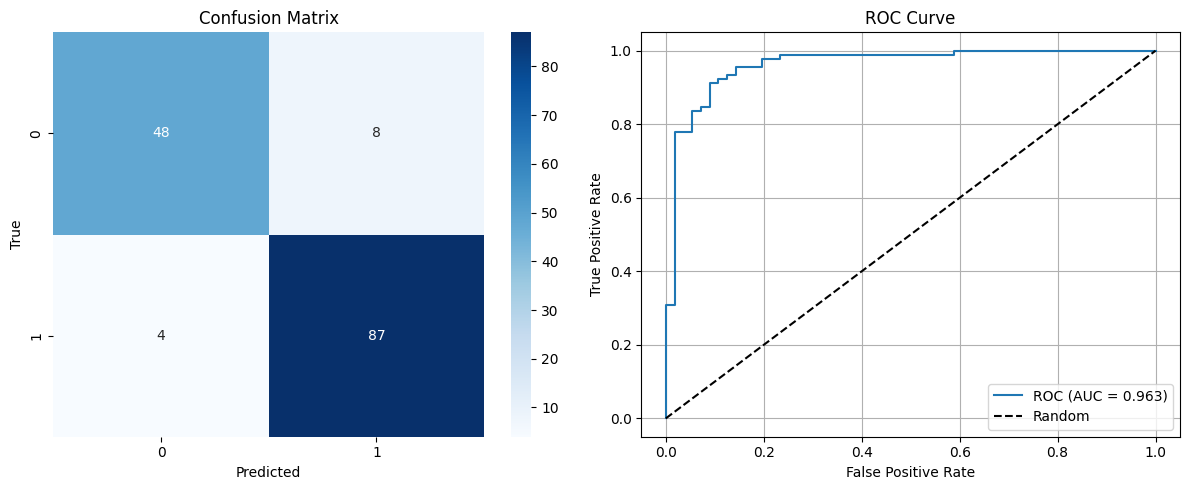

La sensibilité : 0.9560439560439561
la spécificité :  0.8571428571428571


In [106]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Prédictions
model.eval()
with torch.no_grad():
    y_pred_probs = torch.softmax(model(x_test), dim=1)[:, 1].numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

y_true = y_test.numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_true, y_pred)
VN, FP, FN, VP = cm.ravel()
print("La sensibilité :" ,  VP / (VP + FN))
print("la spécificité : ", VN / (FP + VN))

On obtient des résultats bon. Comparé à d'autres points de la courbe ROC, Pour un seuil à 0.5 on fait le trade d'avoir une meilleure sensibilité et une moins bonne spécificité 

On reprend le même MLP mais cette fois on veut comparer l'influence de la diminution du nombre de données factorielles en entrée. Les prédicteurs éliminés ont été jugé dans la partie exploratoire comme étant corrélé avec les prédicteurs choisi. 

In [107]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon
y = y = y_binary.values 

test_cat = ["weathersit", "workingday", 'yr']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,  
    stratify=y, 
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 7])
y_train shape: torch.Size([584])
x_test shape : torch.Size([147, 7])


In [109]:
model = BikeModelBinaryClassification(x_train.shape[1], lr=1e-3)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name    | Type             | Params | Mode  | FLOPs
-------------------------------------------------------------
0 | layers  | Sequential       | 818    | train | 0    
1 | loss_fn | CrossEntropyLoss | 0      | train | 0    
-------------------------------------------------------------
818       Trainable params
0         Non-trainable params
818       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 183.71it/s, v_num=Data, val_loss=0.312, val_acc=0.857, train_loss=0.220, train_acc=0.908]

`Trainer.fit` stopped: `max_epochs=45` reached.


Epoch 44: 100%|██████████| 73/73 [00:00<00:00, 182.97it/s, v_num=Data, val_loss=0.312, val_acc=0.857, train_loss=0.220, train_acc=0.908]
temps nécessaire pour entraîner :  19.104857683181763


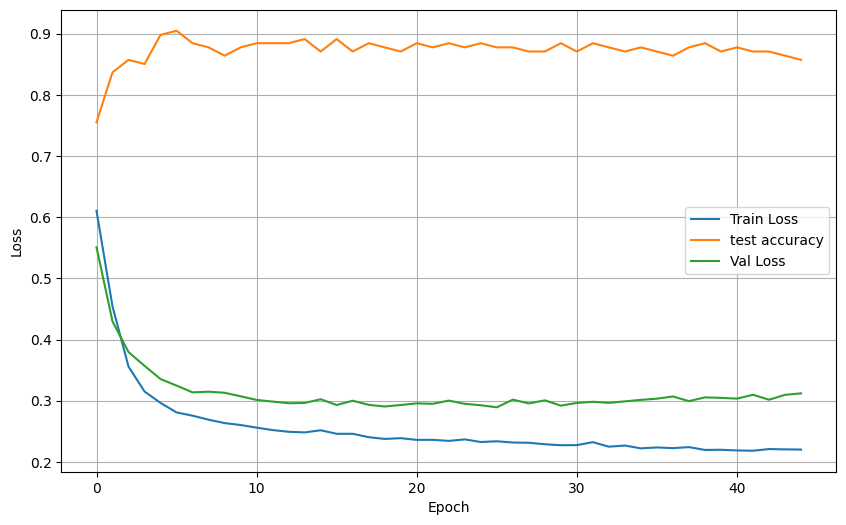

In [110]:
start_time = time.time()
trainer = pl.Trainer(
    max_epochs=45,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  

trainer.fit(model, train_loader, test_loader)
end_time = time.time()

print("temps nécessaire pour entraîner : ", end_time - start_time)
plt.figure(figsize=(10, 6))
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_acc"], label="test accuracy")
plt.plot(trainer.logger.metrics["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


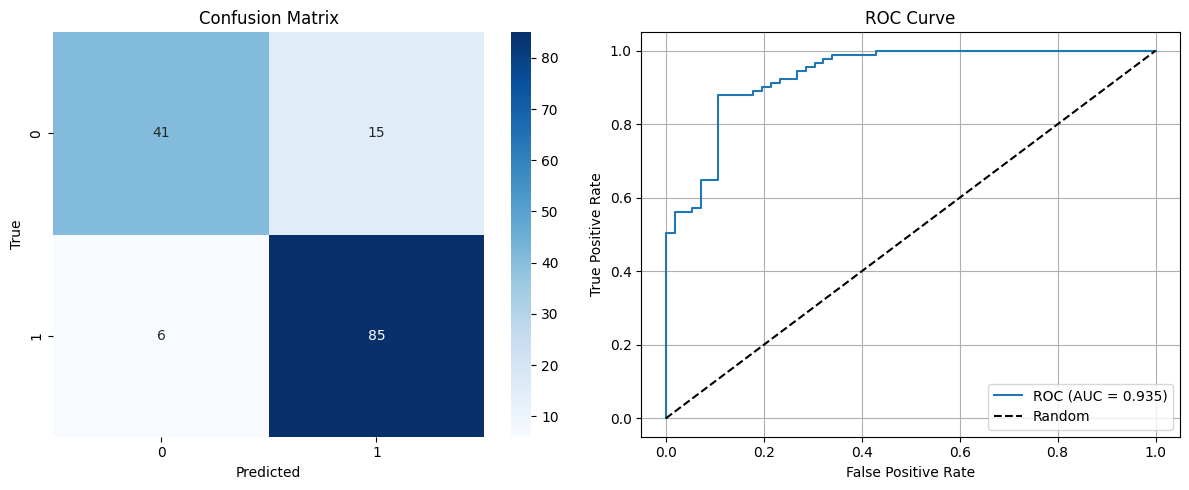

In [111]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Prédictions
model.eval()
with torch.no_grad():
    y_pred_probs = torch.softmax(model(x_test), dim=1)[:, 1].numpy()
    y_pred = (y_pred_probs > 0.5).astype(int)

y_true = y_test.numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

gain_temps = (18.638004302978516 - 18.574875354766846) / 18.638004302978516

In [91]:
gain_temps *100

0.3387108790482539

On obtient de moins bon résultat avec une AUC = 0.935 < 0.96 mais on a gagné 0.3% de temps. Concrètement, on ne peut pas dire que le trade est intéressant dans ce cas de diminuer la taille du vecteur d'entrée pour diminuer la durée d'entraînement du modèle. 


Difficulté après 50 epoch, on remarque que le modèle diverge. 

On a voulu comparer la régression suivie d’une classification avec un modèle de classification directe pour voir si toute l’info utile pour classifier est captée en régression. Le but est de savoir à quelle point le modèle de régression est moins adaptée pour cette tâche.

In [113]:


y = data["cnt"]
y = y.values.reshape(-1, 1)

X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1
print(x_cat.head())
X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

print("Données finales :")
print(X_final.head())
print(f"Shape : {X_final.shape}")

stratify_columns = data[["weathersit", "workingday", 'yr']]

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print(f"\nx_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

   weathersit_2  weathersit_3  workingday_1   yr_1
0          True         False         False  False
1          True         False         False  False
2         False         False          True  False
3         False         False          True  False
4         False         False          True  False
Données finales :
          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
Shape : (731, 7)

x_train shape : torch.Size([584, 7])
y_train shape : torch.Size([584, 1])
x_test shape : torch.Size([147, 7])
y_test shape : torch.Size

 ## Model Definition

  | Name       | Type       | Params | Mode  | FLOPs
----------------------------------------------------------
0 | activation | ReLU       | 0      | train | 0    
1 | layers     | Sequential | 4.5 K  | train | 0    
2 | mse        | MSELoss    | 0      | train | 0    
----------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
0         Total Flops


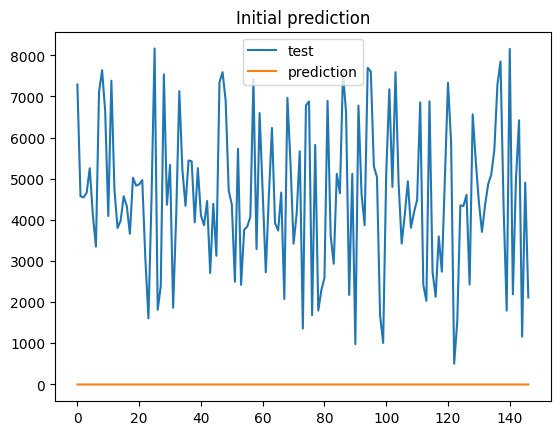

In [114]:
class Bike_model(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(Bike_model, self).__init__()
        self.activation = nn.ReLU()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)   
        )
        self.mse = nn.MSELoss()
        self.lr = lr

    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = Bike_model(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)
plt.plot(y_test, label="test")
plt.plot(model(x_test).detach(), label="prediction")
plt.title("Initial prediction")
plt.legend()

Le premier modèle entraîné est un MLP avec comme y de sortie la colonne cnt qui compte le nombre de vélos utilisés.

 ## Train the Model

In [115]:
trainer = pl.Trainer(
    max_epochs=50,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [116]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name       | Type       | Params | Mode  | FLOPs
----------------------------------------------------------
0 | activation | ReLU       | 0      | train | 0    
1 | layers     | Sequential | 4.5 K  | train | 0    
2 | mse        | MSELoss    | 0      | train | 0    
----------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 226.80it/s, v_num=Data, val_loss=2.05e+6, train_loss=2.11e+6]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 73/73 [00:00<00:00, 225.71it/s, v_num=Data, val_loss=2.05e+6, train_loss=2.11e+6]


 ## Evaluate Model

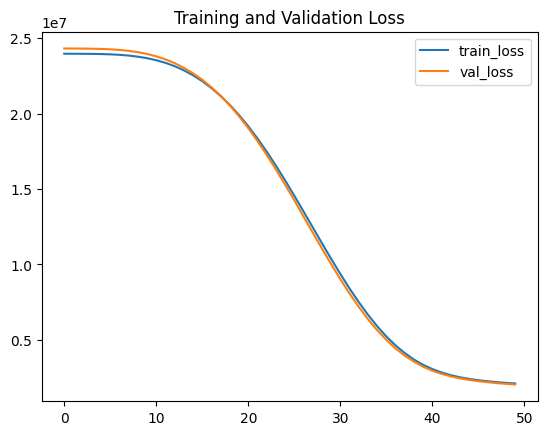

In [117]:
plt.plot(trainer.logger.metrics["train_loss"], label="train_loss")
plt.plot(trainer.logger.metrics["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.legend()

Ici on représente la MSE au fur et à mesure des epoch. On voit que les améliorations du modèle  sont minim après 50 epoch, on diminuera le nombre d'epoch par la suite. Il nous reste encore à compter les prédictions mal classé. 

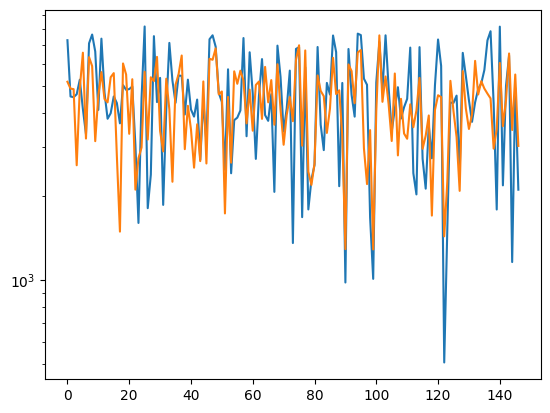

In [118]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()

Prédiction du modèle sur les données test. Il y a un bon suivi des tendances même dans les parties les moins linéaires.


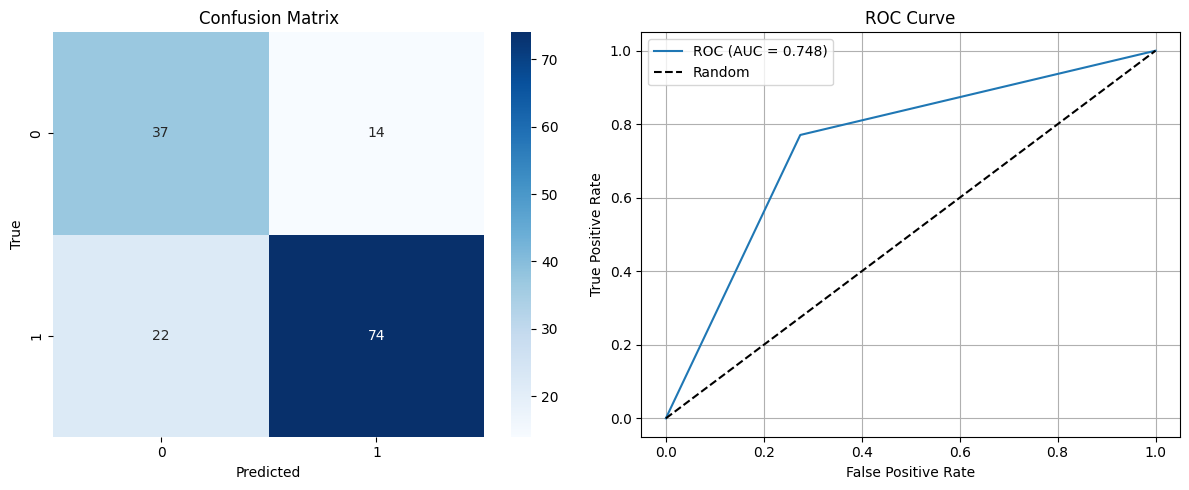

In [122]:
from sklearn.metrics import confusion_matrix
y_pred = model(x_test).detach().numpy().flatten()

# Binariser avec seuil 4000
y_test_bin = (y_test.numpy() >= 4000).astype(int)
y_pred_bin = (y_pred >= 4000).astype(int)

cm = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Le modèle de régression est beaucoup moins adaptée à la classification. En comparaison avec le modèle de classification précédent, l'AUC de 0.748 est plus petit par rapport à 0.935.

Dans un second temps on décide d'entraîner un 2ème MLP pour la régression parce que dans nos données d'entraînement on fait la distinction entre le nombre d’usagers à la fois abonnés et non abonnés.

Le mieux : faire des courches pour évaluer y_1 et y_2 et après une couche y_final = somme des 2 sigma(supérieur pu inférieur à 4000). 

In [123]:
y = data[["registered", "casual"]]
y = y.values.reshape((-1,2))
X_categories = X_factor.loc[:, test_cat]
x_cat = pd.get_dummies(X_categories, drop_first=True)
#On enlève les premières modalités pour éviter la redondance dans les variables catégorielles : workingday_1 + workingday_0 = 1

X_final = pd.concat([pd.DataFrame(X_scaled), x_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=stratify_columns,
    test_size=0.2,
    random_state=123
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [124]:
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("x_train shape:", x_train.shape)
print("x_test shape :", x_test.shape)


x_train shape: torch.Size([584, 7])
x_test shape : torch.Size([147, 7])


In [125]:
class bikemodel_2_output(pl.LightningModule):
    def __init__(self, input_dim, lr=1e-3):
        super(bikemodel_2_output, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)   # deux sorties : casual, registered
        )
        self.mse = nn.MSELoss()
        self.lr = lr
    def forward(self, x):
        return self.layers(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.layers(x)
        loss = self.mse(yhat, y)
        mae = (yhat - y).abs().mean(1)
        self.log(f"train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)

model = bikemodel_2_output(x_train.shape[1], lr=1e-4)
summary = ModelSummary(model)
print(summary)

  | Name   | Type       | Params | Mode  | FLOPs
------------------------------------------------------
0 | layers | Sequential | 4.5 K  | train | 0    
1 | mse    | MSELoss    | 0      | train | 0    
------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
0         Total Flops


In [26]:
trainer = pl.Trainer(
    max_epochs=150,
    logger=SimpleLogger(),
    enable_checkpointing=False,
    log_every_n_steps=1,
)  # logger=False, enable_checkpointing=False to avoid polluting your workspace with lightning_logs and checkpoints

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Avec seulement 50 epoch c'est assez.

In [27]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)


  | Name   | Type       | Params | Mode  | FLOPs
------------------------------------------------------
0 | layers | Sequential | 4.5 K  | train | 0    
1 | mse    | MSELoss    | 0      | train | 0    
------------------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
0         Total Flops


c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 106.87it/s, v_num=Data, val_loss=5.42e+5, train_loss=5.46e+5]

`Trainer.fit` stopped: `max_epochs=150` reached.


Epoch 149: 100%|██████████| 73/73 [00:00<00:00, 106.40it/s, v_num=Data, val_loss=5.42e+5, train_loss=5.46e+5]


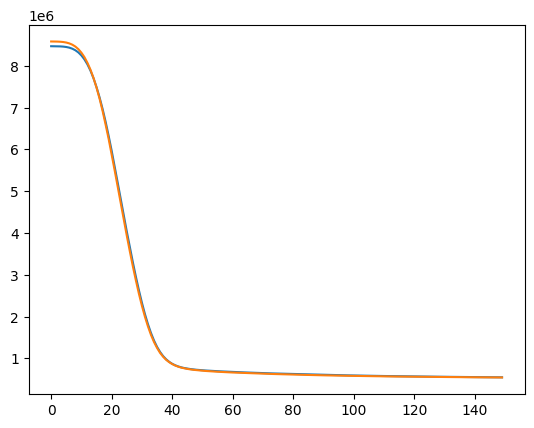

In [28]:

plt.plot(trainer.logger.metrics["train_loss"])
plt.plot(trainer.logger.metrics["val_loss"])
plt.show()

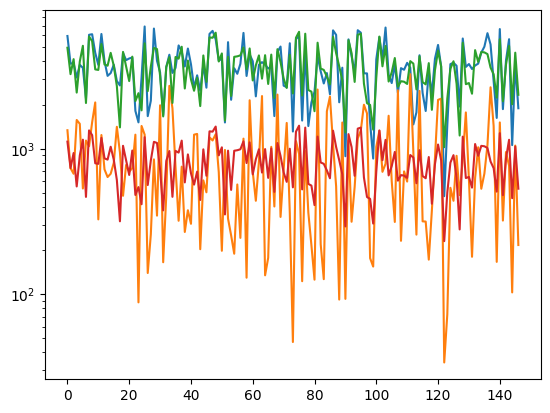

In [29]:
plt.plot(y_test)
plt.plot(model(x_test).detach())
plt.yscale("log")
plt.show()

Les prédictions sur registered sont meilleurs que sur casual qui doit sûrement avoir plus de variance. 

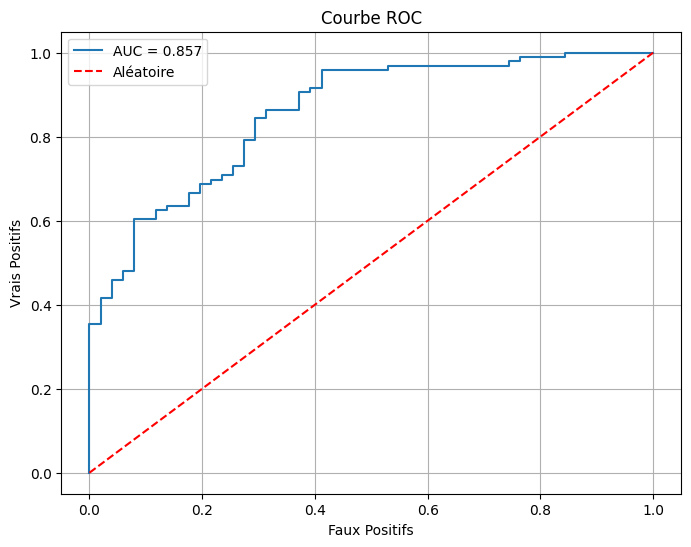

Score AUC: 0.857


In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Prédictions
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for x, y in test_loader:
        predictions.append(model(x))
        actuals.append(y)

predictions = torch.cat(predictions).cpu().numpy()
actuals = torch.cat(actuals).cpu().numpy()

# Total vélos (somme des 2 colonnes)
pred_total = predictions[:, 0] + predictions[:, 1]
actual_total = actuals[:, 0] + actuals[:, 1]

# Classes binaires (>4000 = 1, sinon 0)
actual_class = (actual_total > 4000).astype(int)

fpr, tpr, thresholds = roc_curve(actual_class, pred_total)
auc_score = auc(fpr, tpr)

# Graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'r--', label='Aléatoire')
plt.xlabel('Faux Positifs')
plt.ylabel('Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

print(f"Score AUC: {auc_score:.3f}")

L'AUC est amélioré par rapport au modèle entraîné pour la régression mais il est moins bon pour la classification que les modèles de classification. 

# Question 5
Régression logistique


VP: 81, VN: 43, FP: 13, FN: 10


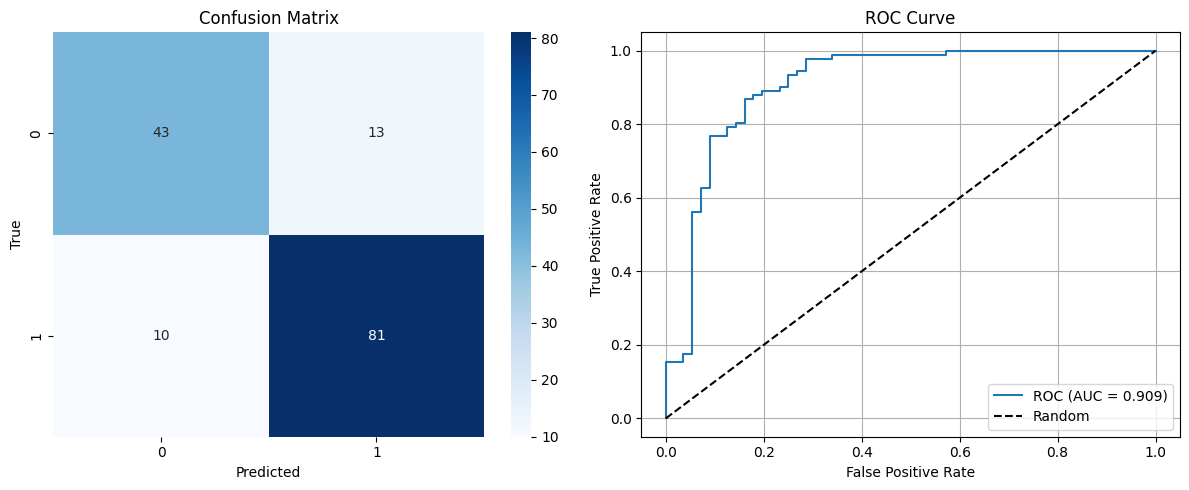

In [134]:
y_binary = (data["cnt"] > 4000).astype(int)  # 1 si >4000, 0 sinon

y = y_binary 
x_train, x_test, y_train, y_test = train_test_split(
    X_final.values,
    y,
    stratify=y.values,
    test_size=0.2,
    random_state=123
)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

# Prédictions
y_pred_probs = log_reg.predict_proba(x_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
VN, FP, FN, VP = cm.ravel()

print(f"VP: {VP}, VN: {VN}, FP: {FP}, FN: {FN}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

L'AUC obtenu montre que la régression logistique arrive moins bien à classer que le MLP. 0.909  < 0.935.

# **Partie 2 : Série temporelle**

INFORMATIONS DE BASE
Période couverte: de 2011-01-01 00:00:00 à 2012-12-31 00:00:00
Nombre de jours: 731
Valeurs manquantes dans cnt: 0

Statistiques descriptives de cnt:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


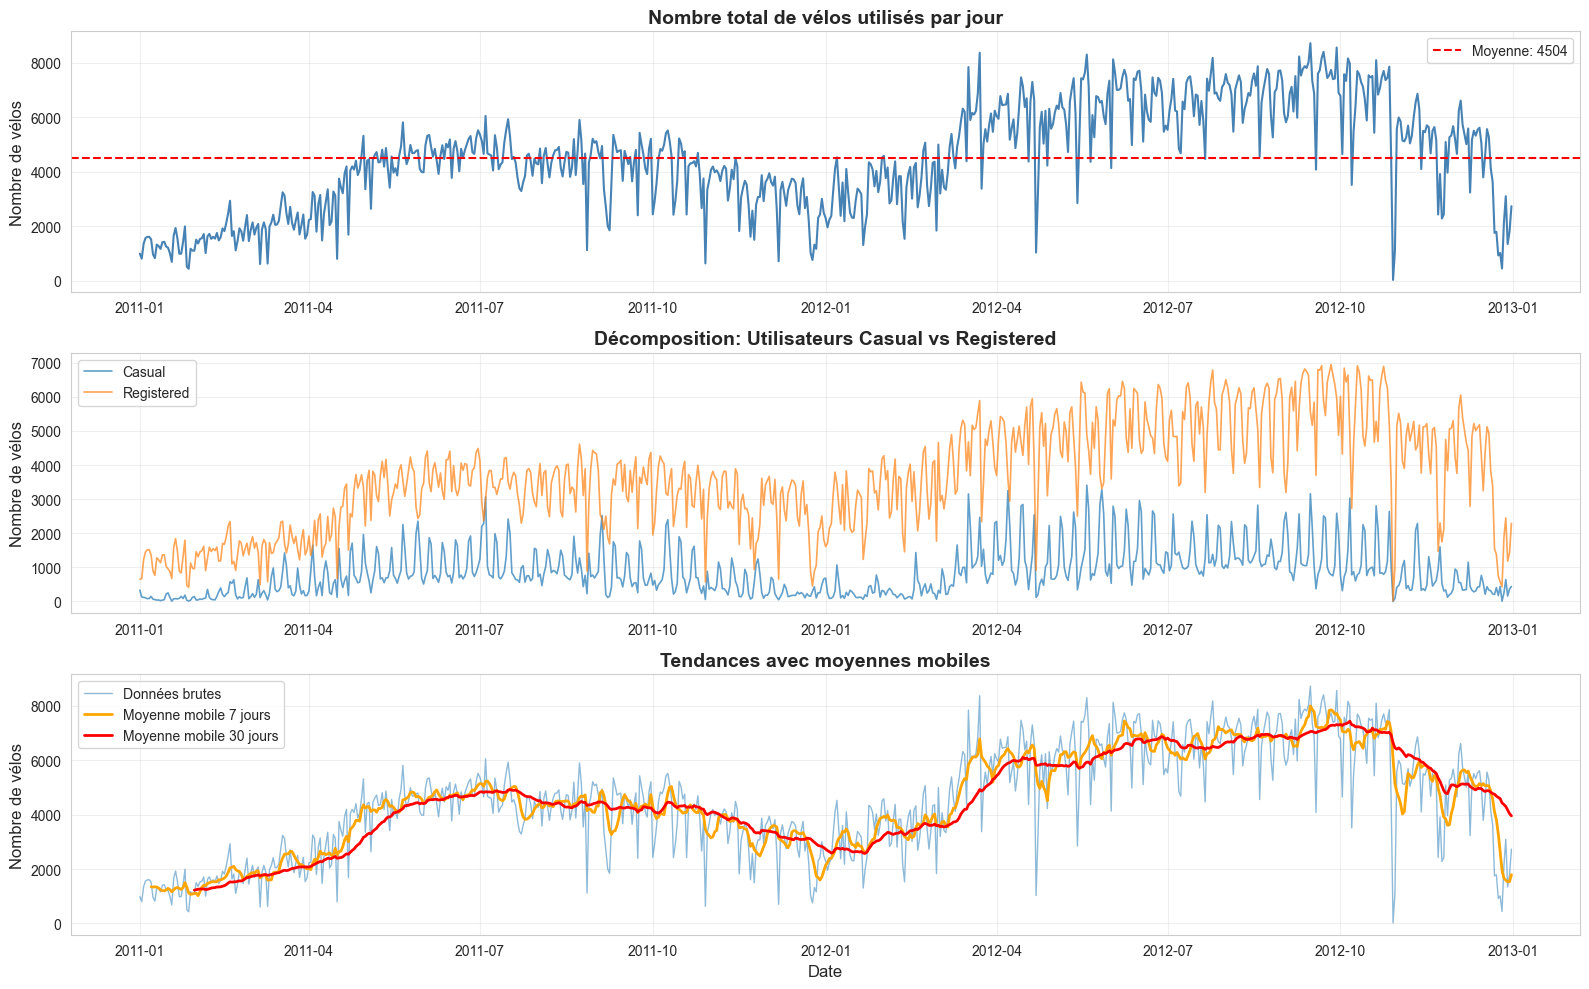

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

data['dteday'] = pd.to_datetime(data['dteday'])
data = data.sort_values('dteday')
data.set_index('dteday', inplace=True)

print("="*60)
print("INFORMATIONS DE BASE")
print("="*60)
print(f"Période couverte: de {data.index.min()} à {data.index.max()}")
print(f"Nombre de jours: {len(data)}")
print(f"Valeurs manquantes dans cnt: {data['cnt'].isna().sum()}")
print(f"\nStatistiques descriptives de cnt:")
print(data['cnt'].describe())

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

# Graphique principal
axes[0].plot(data.index, data['cnt'], linewidth=1.5, color='steelblue')
axes[0].set_title('Nombre total de vélos utilisés par jour', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de vélos', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=data['cnt'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {data["cnt"].mean():.0f}')
axes[0].legend()

# Casual vs Registered
if 'casual' in data.columns and 'registered' in data.columns:
    axes[1].plot(data.index, data['casual'], label='Casual', 
                 linewidth=1.2, alpha=0.7)
    axes[1].plot(data.index, data['registered'], label='Registered', 
                 linewidth=1.2, alpha=0.7)
    axes[1].set_title('Décomposition: Utilisateurs Casual vs Registered', 
                      fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Nombre de vélos', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Moyennes mobiles
axes[2].plot(data.index, data['cnt'], linewidth=1, 
             alpha=0.5, label='Données brutes')
axes[2].plot(data.index, data['cnt'].rolling(window=7).mean(), 
             linewidth=2, label='Moyenne mobile 7 jours', color='orange')
axes[2].plot(data.index, data['cnt'].rolling(window=30).mean(), 
             linewidth=2, label='Moyenne mobile 30 jours', color='red')
axes[2].set_title('Tendances avec moyennes mobiles', 
                  fontsize=14, fontweight='bold')
axes[2].set_ylabel('Nombre de vélos', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Il y a de la saisonnalité, et une tendance haussière. Il faut donc appliquer une différentiation de lag 1 et une autre sur 12 mois. 

In [137]:
data_reset = data.reset_index(drop = True)
print(data_reset)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

In [138]:
X_final

,0,1,2,weathersit_2,weathersit_3,workingday_1,yr_1
0,-0.826662,1.250171,-0.387892,1.0,0.0,0.0,0.0
1,-0.721095,0.479113,0.749602,1.0,0.0,0.0,0.0
2,-1.634657,-1.339274,0.746632,0.0,0.0,1.0,0.0
3,-1.614780,-0.263182,-0.389829,0.0,0.0,1.0,0.0
4,-1.467414,-1.341494,-0.046307,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
726,-1.318665,0.175807,2.061426,1.0,0.0,1.0,1.0
727,-1.323224,-0.266238,-0.452131,1.0,0.0,1.0,1.0
728,-1.323224,0.878392,-0.853552,1.0,0.0,0.0,1.0
729,-1.309558,-1.015664,2.069444,0.0,0.0,0.0,1.0


In [141]:
test_cat = ["weathersit", "workingday", 'yr', 'season', 'mnth', 'holiday', 'weekday']

X_cat = pd.get_dummies(X_factor.loc[:, test_cat], drop_first=True)
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat.reset_index(drop=True)], axis=1)
X_final = X_final.astype(float)

data_mat = pd.concat([X_final, data_reset["cnt"]], axis=1)
print(data_mat.head())
data_mat = data_mat.values


          0         1         2  weathersit_2  weathersit_3  workingday_1  \
0 -0.826662  1.250171 -0.387892           1.0           0.0           0.0   
1 -0.721095  0.479113  0.749602           1.0           0.0           0.0   
2 -1.634657 -1.339274  0.746632           0.0           0.0           1.0   
3 -1.614780 -0.263182 -0.389829           0.0           0.0           1.0   
4 -1.467414 -1.341494 -0.046307           0.0           0.0           1.0   

   yr_1  season_2  season_3  season_4  ...  mnth_11  mnth_12  holiday_1  \
0   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
1   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
2   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
3   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   
4   0.0       0.0       0.0       0.0  ...      0.0      0.0        0.0   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6   cnt  
0        0

On a choisit de faire des séquence de longueur 5 semaines, soit environ 1/3 d'une saison (hiver, été...)

Le test size à 28 donne des résultats médiocres

In [163]:
time_steps = data.shape[0]
samples = []
target = []
length = 35  # sequence length
test_size = 150

for i in range(time_steps - length):
    sample = data_mat[i : i + length, :28]

    outcome = data_mat[i + length, 28]
    samples.append(sample)
    target.append(outcome)

# Convert to arrays
samples = np.array(samples)
target = np.array(target)

# Train/test split
x_train = samples[:-test_size]
x_test = samples[-test_size:]
y_train = target[:-test_size]
y_test = target[-test_size:]

print("x_train:", x_train.shape)
print("x_test :", x_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


x_train: (546, 35, 28)
x_test : (150, 35, 28)
y_train: (546,)
y_test : (150,)


In [154]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

Il faut découper nos données en périodes distinctes. 

In [155]:
class RNNModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, dense1, dense2, dense3):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True,
            nonlinearity="relu",
        )
        
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, dense1)
        self.fc2 = nn.Linear(dense1, dense2)
        self.fc3 = nn.Linear(dense2, dense3)
        self.out = nn.Linear(dense3, 1)
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.save_hyperparameters()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # take the last hidden state
        out = self.dropout(self.relu(self.fc1(out)))
        out = self.dropout(self.relu(self.fc2(out)))
        out = self.dropout(self.relu(self.fc3(out)))
        out = self.out(out)
        return out

    def training_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_seq, prediction = batch
        outputs = self(input_seq)
        loss = self.criterion(outputs, prediction)
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return [optimizer]


input_size = 28
hidden_size = 64
model = RNNModel(input_size, hidden_size,64, 16, 8)
print(model)

RNNModel(
  (rnn): RNN(28, 64, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)


In [156]:
x_train_tensor.shape

torch.Size([668, 35, 28])

In [158]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=20,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [159]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:881: Checkpoint directory c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\Neural_network\SimpleLogger\MajeureData\checkpoints exists and is not empty.

  | Name      | Type    | Params | Mode  | FLOPs
------------------------------------------------------
0 | rnn       | RNN     | 6.0 K  | train | 0    
1 | dropout   | Dropout | 0      | train | 0    
2 | fc1       | Linear  | 4.2 K  | train | 0    
3 | fc2       | Linear  | 1.0 K  | train | 0    
4 | fc3       | Linear  | 136    | train | 0    
5 | out       | Linear  | 9      | train | 0    
6 | relu      | ReLU    | 0      | train | 0    
7 | criterion | MSELoss | 0      | train | 0    
------------------------------------------------------
11.4 K    Trainable params
0         Non-trainable params
11.4 K    Total params
0.045     Total estimated model params size (MB)
8         Modules in tr

c:\Users\enzom\OneDrive\Bureau\MINES\SDD\Mines_data_science\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:317: The number of training batches (14) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 14/14 [00:00<00:00, 41.98it/s, v_num=Data, val_loss=1.8e+7, train_loss=2.55e+7]

Epoch 0, global step 14: 'val_loss' reached 17990178.00000 (best 17990178.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=0-step=14.ckpt' as top 1


Epoch 1: 100%|██████████| 14/14 [00:00<00:00, 53.65it/s, v_num=Data, val_loss=1.7e+7, train_loss=2.54e+7]

Epoch 1, global step 28: 'val_loss' reached 17017276.00000 (best 17017276.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=1-step=28.ckpt' as top 1


Epoch 2: 100%|██████████| 14/14 [00:00<00:00, 59.45it/s, v_num=Data, val_loss=1.71e+7, train_loss=2.02e+7]

Epoch 2, global step 42: 'val_loss' was not in top 1


Epoch 3: 100%|██████████| 14/14 [00:00<00:00, 69.51it/s, v_num=Data, val_loss=1.77e+7, train_loss=2.48e+7]

Epoch 3, global step 56: 'val_loss' was not in top 1


Epoch 4: 100%|██████████| 14/14 [00:00<00:00, 81.58it/s, v_num=Data, val_loss=1.75e+7, train_loss=2.5e+7] 

Epoch 4, global step 70: 'val_loss' was not in top 1


Epoch 5: 100%|██████████| 14/14 [00:00<00:00, 73.32it/s, v_num=Data, val_loss=8e+6, train_loss=2.18e+7]  

Epoch 5, global step 84: 'val_loss' reached 8003817.00000 (best 8003817.00000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=5-step=84.ckpt' as top 1


Epoch 6: 100%|██████████| 14/14 [00:00<00:00, 95.02it/s, v_num=Data, val_loss=3.56e+6, train_loss=6.18e+6]

Epoch 6, global step 98: 'val_loss' reached 3558142.25000 (best 3558142.25000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=6-step=98.ckpt' as top 1


Epoch 7: 100%|██████████| 14/14 [00:00<00:00, 88.23it/s, v_num=Data, val_loss=3.43e+6, train_loss=4.06e+6] 

Epoch 7, global step 112: 'val_loss' reached 3425658.50000 (best 3425658.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=7-step=112.ckpt' as top 1


Epoch 8: 100%|██████████| 14/14 [00:00<00:00, 103.77it/s, v_num=Data, val_loss=3.82e+6, train_loss=3.56e+6]

Epoch 8, global step 126: 'val_loss' was not in top 1


Epoch 9: 100%|██████████| 14/14 [00:00<00:00, 100.66it/s, v_num=Data, val_loss=3.31e+6, train_loss=3.08e+6]

Epoch 9, global step 140: 'val_loss' reached 3312407.75000 (best 3312407.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=9-step=140.ckpt' as top 1


Epoch 10: 100%|██████████| 14/14 [00:00<00:00, 99.17it/s, v_num=Data, val_loss=3.36e+6, train_loss=2.67e+6] 

Epoch 10, global step 154: 'val_loss' was not in top 1


Epoch 11: 100%|██████████| 14/14 [00:00<00:00, 96.24it/s, v_num=Data, val_loss=3.35e+6, train_loss=2.73e+6] 

Epoch 11, global step 168: 'val_loss' was not in top 1


Epoch 12: 100%|██████████| 14/14 [00:00<00:00, 88.01it/s, v_num=Data, val_loss=3.37e+6, train_loss=2.55e+6]

Epoch 12, global step 182: 'val_loss' was not in top 1


Epoch 13: 100%|██████████| 14/14 [00:00<00:00, 109.28it/s, v_num=Data, val_loss=3.46e+6, train_loss=2.54e+6]

Epoch 13, global step 196: 'val_loss' was not in top 1


Epoch 14: 100%|██████████| 14/14 [00:00<00:00, 90.57it/s, v_num=Data, val_loss=3.42e+6, train_loss=2.26e+6] 

Epoch 14, global step 210: 'val_loss' was not in top 1


Epoch 15: 100%|██████████| 14/14 [00:00<00:00, 96.72it/s, v_num=Data, val_loss=3.76e+6, train_loss=2.22e+6] 

Epoch 15, global step 224: 'val_loss' was not in top 1


Epoch 16: 100%|██████████| 14/14 [00:00<00:00, 95.89it/s, v_num=Data, val_loss=3.29e+6, train_loss=2.45e+6] 

Epoch 16, global step 238: 'val_loss' reached 3294414.50000 (best 3294414.50000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=16-step=238.ckpt' as top 1


Epoch 17: 100%|██████████| 14/14 [00:00<00:00, 96.83it/s, v_num=Data, val_loss=3.47e+6, train_loss=2.1e+6]  

Epoch 17, global step 252: 'val_loss' was not in top 1


Epoch 18: 100%|██████████| 14/14 [00:00<00:00, 90.66it/s, v_num=Data, val_loss=4.04e+6, train_loss=2.11e+6]

Epoch 18, global step 266: 'val_loss' was not in top 1


Epoch 19: 100%|██████████| 14/14 [00:00<00:00, 89.58it/s, v_num=Data, val_loss=3.27e+6, train_loss=2.27e+6] 

Epoch 19, global step 280: 'val_loss' reached 3272832.75000 (best 3272832.75000), saving model to 'c:\\Users\\enzom\\OneDrive\\Bureau\\MINES\\SDD\\Mines_data_science\\Neural_network\\SimpleLogger\\MajeureData\\checkpoints\\epoch=19-step=280.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 14/14 [00:00<00:00, 84.84it/s, v_num=Data, val_loss=3.27e+6, train_loss=2.27e+6]


In [160]:
best_model = RNNModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()


RNNModel(
  (rnn): RNN(28, 64, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (criterion): MSELoss()
)

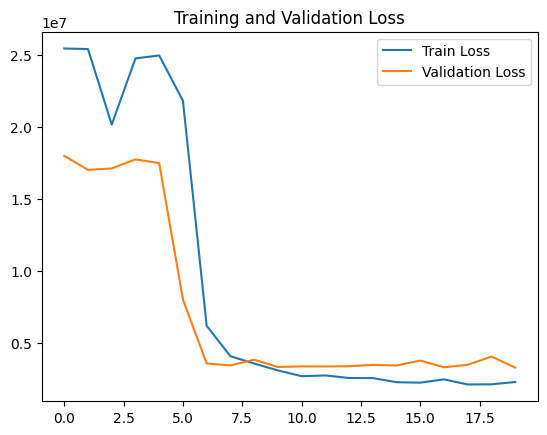

In [161]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
# plt.yscale("log")
plt.show()

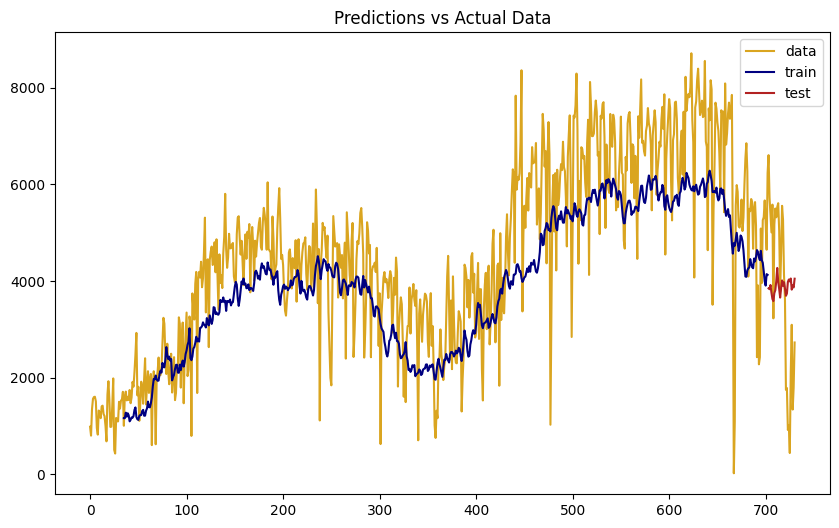

In [162]:
model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

In [ ]:

class LSTMModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_layers=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )
        
        self.criterion = nn.MSELoss()
        self.save_hyperparameters()

    def forward(self, x):
        out, (hidden, cell) = self.lstm(x)
        out = out[:, -1, :]  # Dernier timestep
        out = self.fc(out)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        
        rmse = torch.sqrt(loss)
        
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("train_rmse", rmse, prog_bar=False, on_step=False, on_epoch=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        yhat = self.forward(x)
        loss = self.mse(yhat, y)
        self.log(f"val_loss", loss, on_epoch=True, on_step=False, prog_bar=True)
        self.log("val_rmse", torch.sqrt(loss), prog_bar=False, on_step=False, on_epoch=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return [optimizer]
    
model = LSTMModel(input_size=7, hidden_size=128, num_layers=6, dropout=0.3)


In [ ]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor="val_loss", min_delta=0.00, patience=10, verbose=True, mode="min"
)
checkpoint_callback = ModelCheckpoint(
    save_top_k=1, monitor="val_loss", mode="min", verbose=True
)
trainer = pl.Trainer(
    max_epochs=20,
    logger=SimpleLogger(),
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    callbacks=[
        # early_stopping, # Early stopping
        checkpoint_callback,  # Save model with best val_loss
    ],
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [ ]:
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

In [228]:
best_model = LSTMModel.load_from_checkpoint(
    checkpoint_path=checkpoint_callback.best_model_path
)
best_model.eval()

LSTMModel(
  (lstm): LSTM(7, 128, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
  (criterion): MSELoss()
)

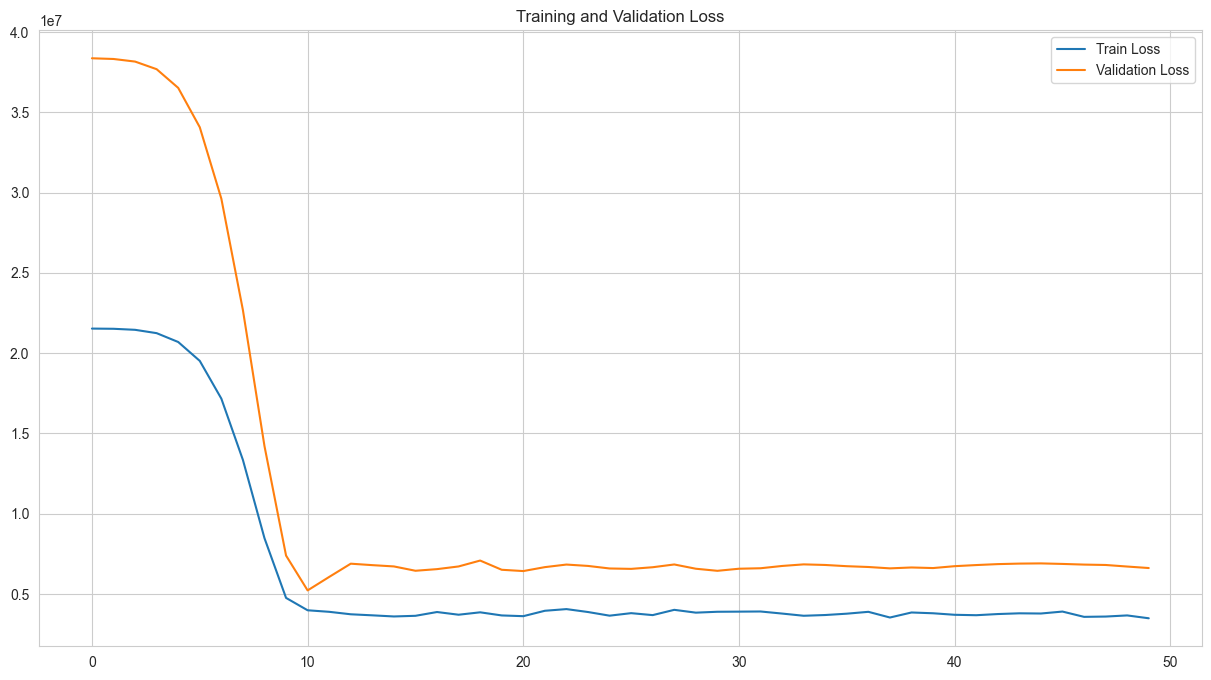

In [229]:
plt.plot(trainer.logger.metrics["train_loss"], label="Train Loss")
plt.plot(trainer.logger.metrics["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

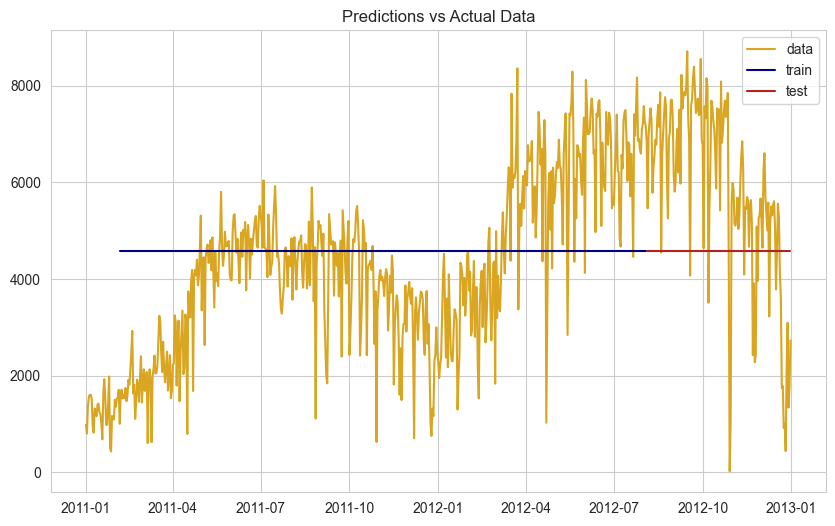

In [230]:
model.eval()
with torch.no_grad():
    train_preds = best_model(x_train_tensor).cpu().numpy()
    test_preds = best_model(x_test_tensor).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data["cnt"], c="goldenrod", label="data")
plt.plot(data.iloc[length : -len(y_test)].index, train_preds, c="navy", label="train")
plt.plot(data.iloc[-len(y_test) :].index, test_preds, c="firebrick", label="test")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

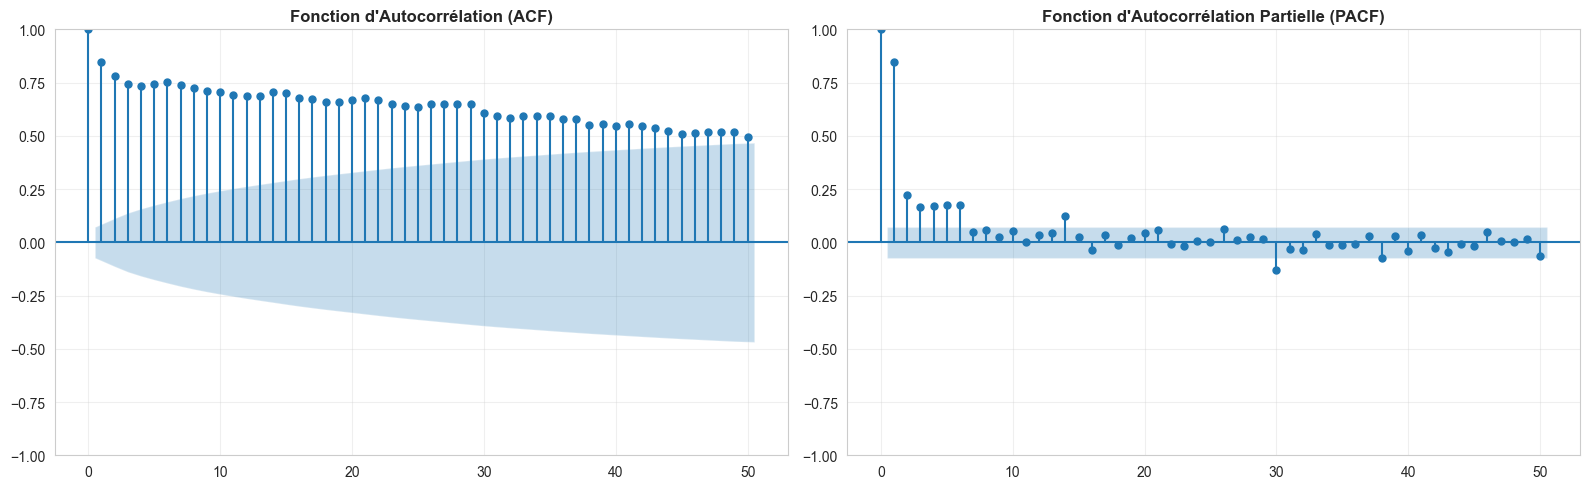

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(data['cnt'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Fonction d\'Autocorrélation (ACF)', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

plot_pacf(data['cnt'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Fonction d\'Autocorrélation Partielle (PACF)', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### **Analyse des fonctions d'autocorrélation**

#### **1. Observations**
- **Fonction d'autocorrélation (ACF)** :
  La décroissance exponentielle de l'ACF suggère la présence d'une **composante autorégressive (AR)** dans la série temporelle. Ce comportement est typique d'un processus où les valeurs passées influencent significativement les valeurs futures, avec un effet qui s'atténue progressivement.

- **Fonction d'autocorrélation partielle (PACF)** :
  La PACF devient nulle à partir du **lag 6**, avec des pics significatifs aux lags inférieurs. Cela indique que le processus peut être modélisé par un **modèle AR(6)**, où seuls les 6 lags précédents ont un impact direct sur la valeur actuelle.

#### **2. Interprétation et hypothèses**
- **Modèle ARMA(6,0)** :
  D'après l'analyse de la PACF, un modèle **AR(6)** semble approprié pour capturer la structure de dépendance linéaire de la série.

- **Saisonnalité** :
  - **Effet hebdomadaire** : L'influence du même jour de la semaine précédente suggère une **saisonnalité de lag 7**. Cela peut être capturé par une **différenciation saisonnière** d'ordre 1 avec un lag 7.
  - **Tendance annuelle** : Une saisonnalité annuelle est également suspectée, ce qui pourrait nécessiter une différenciation saisonnière supplémentaire avec un lag 365 (pour des données quotidiennes) ou 52 (pour des données hebdomadaires).

#### **3. Proposition de modélisation**
Pour intégrer ces observations, un modèle **SARIMA** (Seasonal ARIMA) est recommandé :
- **Composante non saisonnière** : AR(6), soit \( p = 6 \).
- **Composante saisonnière** :
  - Différenciation saisonnière d'ordre 1 avec un lag 7, soit \( (P, D, Q)_7 = (0, 1, 0)_7 \).
  - Si la saisonnalité annuelle est confirmée, une différenciation saisonnière supplémentaire avec un lag 365 peut être ajoutée, soit \( (P, D, Q)_{365} = (0, 1, 0)_{365} \).

**Formule finale** :

$SARIMA(6, 0, 0)(0, 1, 0)_7$ ou $SARIMA(6, 0, 0)(0, 1, 0)_7 \times (0, 1, 0)_{365}$


#### **4. Prochaines étapes**
- **Validation du modèle** : Vérifier les résidus pour s'assurer qu'ils sont non corrélés (test de Ljung-Box).
- **Sélection du modèle** : Utiliser des critères comme l'**AIC** ou le **BIC** pour comparer différentes configurations.
- **Prévisions** : Tester le modèle sur un jeu de données de validation pour évaluer sa performance prédictive.

---